# Выпускной проект: "«Метанпромбанк» — деньги не пахнут! Анализ оттока клиентов". Ч.2 -"Основная часть"

Автор - Кудинов Иван

## Материалы:

* [Презентация](https://disk.yandex.ru/i/zv9tGtzgbVU5sg)

## Описание данных

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск. Главной задаче проекта является анализ оттока клиентов. 

Файл «Метанпромбанк» — деньги не пахнут! : [bank_scrooge.csv](https://code.s3.yandex.net/datasets/bank_scrooge.csv).

Набор данных включает следующие поля:
* USERID — идентификатор пользователя,
* score — баллы кредитного скоринга,
* city — город,
* gender — пол,
* age — возраст,
* equity — количество баллов собственности
* balance — баланс на счёте,
* products — количество продуктов, которыми пользуется клиент,
* credit_card — есть ли кредитная карта,
* last_activity — активный клиент,
* EST_SALARY — оценочный доход клиента,
* сhurn — признак оттока.

## Инструкция по выполнению проекта

### Шаг 1. Загрузка данных

### Шаг 2. Предобработка данных

2.1. Приведем название столбцов к правилу красивого кода

2.2. Подготовка данных по столбцам к исследованию (обработка пропусков, аномалий, явных и неявных дубликатов, приведение к правильному типу данных)

2.3. Промежуточные выводы

### Шаг 3. Исследовательский анализ данных

3.1. Посмотрим как влияют баллы кредитного скоринга на отточность клиентов. Найдем клиенты с какими баллами кредитного скоринга чаще попадают в отток.

3.2. Посмотрим как влиет город клиента на отточность. Найдем клиенты из какого города чаще попадают в отток.

3.3. Посмотрим как влиет пол клиента на отточность. Найдем клиенты какого пола чаще попадают в отток.

3.4. Посмотрим как влиет возраст клиента на отточность. Найдем клиенты какого возраста чаще попадают в отток.

3.5. Посмотрим влияет ли количество баллов собственности клиента на отточность. Найдем клиентов с каким количество баллов собственности чаще попадают в отток.

3.6. Посмотрим влияет ли баланс на счёте клиента на отточность. Найдем клиентов с каким балансом на счёте чаще попадают в отток.

3.7. Посмотрим влияет ли количество продуктов, которыми пользуется клиент на отточность. Найдем клиентов с каким количеством продуктов банка чаще попадают в отток.

3.8. Посмотрим влияет ли наличие кредитной карты у клиента на отточность.

3.9. Посмотрим влияет ли активность клиента на отточность.

3.10. Посмотрим влияет ли оценочный доход клиента на отточность. Найдем клиентов с каким оценочным доходом чаще попадают в отток.

3.11. Составим портреты клиентов, которые склонны, уходить из банка и которые не склонны

3.12. Промежуточные выводы

### Шаг 4. Сегментация клиентов оттока

4.1. Объединим признаки отточности и сформируем сегменты. 

4.2. Отберем лучшие сегменты клиентов оттока.

4.3. Сформулируем рекомендации для лучших сегментов клиентов оттока.

4.4. Промежуточные выводы

### Шаг 5. Проверим гипотезы

5.1. Проверим гипотезу что доходы между теми клиентами, которые ушли и теми, которые остались равны.

5.2. Проверим гипотезу что возраст между теми клиентами, которые ушли и теми, которые остались одинаков.

5.3. Проверим гипотезу что баллы кредитного скоринга у клиентов, которые ушли меньше, чем у клиентов, которые остались.

5.4. Проверим гипотезу что количество баллов собственности у клиентов, которые ушли и теми, которые остались равны.

5.5. Проверим гипотезу что количество продуктов, которыми пользуется клиенты, которые ушли меньше, чем у клиентов, которые остались.

5.6. Проверим гипотезу что оценочный доход у клиентов, которые ушли и теми, которые остались равен.

5.7. Промежуточные выводы

### Шаг 6. Общий вывод

In [1]:
# Импортируем и устанавливаем библиотеки для работы:

#импорты из стандартной библиотеки
import pandas as pd
from math import sqrt
from datetime import datetime, timedelta
import datetime as dt
import plotly.express as px
from plotly import graph_objects as go
import warnings

# импорты сторонних библиотек:
import numpy as np
import scipy.stats
from scipy import stats as st
from scipy.stats import binom, norm
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Широкоформатный Jupyter: расширяем границы чтобы сделать работу более комфортной:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [3]:
# Сразу напишем код для увеличения ширины столбцов, чтобы информация полностью выводилась в ячейках:
pd.options.display.max_colwidth = 1

In [4]:
# Для оптимизации кода выделю пути к файлу на компьютере и яндекс практикуме в отдельные переменные:
# Это позволит проще менять путь к файлам при необходимости
pc_csv = 'D:/DA_42_Learning/Projects/FINAL/bank_scrooge.csv'
yandex_csv = 'https://code.s3.yandex.net/datasets/bank_scrooge.csv'

In [5]:
# Загружаем данные о клиентах банка «Метанпром:
try:
    data = pd.read_csv(pc_csv)
except:
    data = pd.read_csv(yandex_csv)
else:
    print('Данные не загружены')

In [6]:
data.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


In [7]:
# Проверим основные данные о файле с помощью функции
def date_info(date_table):
    '''Находим общую инфрмацию об исследуемом датафрейме с помощью функций info, describe, shape, duplicated()
    и выводим количество пропусков по столбцам с помощью функции for.
    '''
    
    print('\033[1m' + 'Общая информация о датафрейме и типы данных:' + '\033[0m')
    display(date_table.info())
    print('\033[1m' + 'Описательная статистика столбцов датафрейма методом describe:' + '\033[0m')
    display(date_table.describe())
    duplicate_dict = {}
    isnull_dict = {}
    for value in date_table.columns:
        duplicate_dict[value] = date_table[value].duplicated().sum()
        isnull_dict[value] = date_table[value].isnull().sum()
        tmp_df = pd.DataFrame([isnull_dict])
    tmp_df.index = ['Пропусков в столбце']
    tmp_df = tmp_df.style.applymap(lambda x: 'color:darkred' if x > 0 else 'color:dark')
    print('\033[1m' + 'Количество пропусков по столбцам:' + '\033[0m')
    display(tmp_df)
    '''опять'''
    print('\033[1m' + 'Количество строк = ' + '\033[0m', f'{date_table.shape[0]}')
    print('\033[1m' + 'Количество столбцов =' + '\033[0m', f'{date_table.shape[1]}\n')
    result_total = print('\033[1m' + 'Явных дубликатов в датафрейме =' + '\033[0m', date_table.duplicated().sum())
    return result_total
date_info(data)

Общая информация о датафрейме и типы данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


None

Описательная статистика столбцов датафрейма методом describe:


,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,10000.00000,10000.000000,9974.000000,10000.000000,7.705000e+03,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,171814.71260,848.699400,42.734409,2.627600,8.277943e+05,1.870100,0.680400,0.523500,1.478669e+05,0.182000
std,33708.23812,65.448519,12.179971,1.980836,1.980614e+06,0.792647,0.466345,0.499472,1.393885e+05,0.385864
min,94561.00000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142810.25000,802.000000,33.000000,0.000000,2.955542e+05,1.000000,0.000000,0.000000,7.525190e+04,0.000000
50%,172728.00000,853.000000,40.000000,3.000000,5.242722e+05,2.000000,1.000000,1.000000,1.196581e+05,0.000000
75%,201261.75000,900.000000,51.000000,4.000000,9.807058e+05,2.000000,1.000000,1.000000,1.745005e+05,0.000000
max,229145.00000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


Количество пропусков по столбцам:


,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
Пропусков в столбце,0,0,0,0,26,0,2295,0,0,0,0,0


Количество строк =  10000
Количество столбцов = 12

Явных дубликатов в датафрейме = 0


По исходным данным можно отметить следующие моменты:
* Количество строк =  10000;
* Количество столбцов = 12;
* Название столбцов необходимо привести к правилу красивого кода;
* Необходимо изменить тип данных по столбцам: score, age;
* Пропуски есть в столбцах: age, balance;
* Явных дубликатов в данных нет.
* В целом датафрейм хорошо заполнен, возможно по полю balance пропуски связаны с нулевым балансом на картах. Надо будет проверить.

## Шаг 2. Предобработка данных

In [8]:
# Создаем копию датасета до преобразования для контроля размера до и после обработки
temp_data = data.copy() 
len(temp_data)

10000

### 2.1. Приведем название столбцов к правилу красивого кода

In [9]:
# приведем названия столцов к правилу красивого кода и сразу проверим:
data.columns = data.columns.str.lower().str.replace(' ', '_')
data.rename(columns = {'userid':'user_id'}, inplace = True )
data.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


### 2.2. Подготовка данных по столбцам к исследованию (обработка пропусков, аномалий, явных и неявных дубликатов, приведение к правильному типу данных)

По каждому столбцу проверю данные и по необходимости преобразую данные в нужные типы и обработаю пропуски, аномалии и явные и неявные дубликаты.

`user_id - идентификатор пользователя`

In [10]:
# Основные данные столбца
def date_info_loc(date_table_loc):
    '''Для обработки столбца перед исследовательским анализом нахожу по каждому столбцу его описательную статистику функцией describe, 
    дубликаты функцией duplicated, частоту уникальных значений функцией value_counts, уникальные значения функцией unique,
    пропуски по столбцу функцией isnull.
    '''
    
    title = date_table_loc,
    print('\033[1m' + 'Описательная статистика столбца датафрейма методом describe:' + '\033[0m'),
    display(date_table_loc.describe()),
    print('\033[1m' + 'Количество дубликатов по столбцу:' + '\033[0m'),
    display(date_table_loc.duplicated().sum()) 
    print('\033[1m' + 'Частота уникальных значений по столбцу:' + '\033[0m'),
    display(date_table_loc.value_counts().head(10)),
    print('\033[1m' + 'Процентное отношение уникальных значений по столбцу:' + '\033[0m'),
    display(round(date_table_loc.value_counts(normalize=True).to_frame().head(10)*100, 3)),
    print('\033[1m' + 'Уникальные значения:' + '\033[0m'),
    display(date_table_loc.unique())
    print('\033[1m' + 'Пропуски по столбцу:' + '\033[0m'),
    display(data.loc[date_table_loc.isnull() == True])
    return 
date_info_loc(data['user_id'])

Описательная статистика столбца датафрейма методом describe:


count    10000.00000 
mean     171814.71260
std      33708.23812 
min      94561.00000 
25%      142810.25000
50%      172728.00000
75%      201261.75000
max      229145.00000
Name: user_id, dtype: float64

Количество дубликатов по столбцу:


73

Частота уникальных значений по столбцу:


227795    2
198635    2
210898    2
210627    2
202983    2
226550    2
155872    2
188957    2
120258    2
171751    2
Name: user_id, dtype: int64

Процентное отношение уникальных значений по столбцу:


,user_id
227795,0.02
198635,0.02
210898,0.02
210627,0.02
202983,0.02
226550,0.02
155872,0.02
188957,0.02
120258,0.02
171751,0.02


Уникальные значения:


array([183012, 146556, 120722, ..., 115639, 148700,  96267])

Пропуски по столбцу:


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn


* Тип данных столбца соответствует его содержанию;
* В столбце есть 73 дубликата;
* Пропусков нет.
* Неявных дубликатов нет.

In [11]:
# проверим дубликаты по столбцу 'user_id' и применим отбор, что клиенты не попадают в отток (churn == 0)
display(data[data.duplicated(subset=['user_id'])].query('churn == 0'))

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1583,190253,726.0,Ярославль,М,49.0,0,NaN,1,1,1,177700.78,0
1837,210662,896.0,Рыбинск,Ж,37.0,0,NaN,2,0,0,90916.04,0
2138,131419,739.0,Рыбинск,Ж,37.0,3,1307941.65,3,0,0,103867.47,0
2165,187635,692.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,160368.82,0
2302,220816,934.0,Рыбинск,Ж,74.0,5,1294285.39,3,1,0,95606.80,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9775,124450,758.0,Рыбинск,Ж,36.0,0,73574.07,2,0,1,79963.59,0
9785,168998,895.0,Рыбинск,М,44.0,0,282653.53,3,0,0,255296.47,0
9819,140934,832.0,Рыбинск,Ж,NaN,3,385763.16,2,0,1,59651.35,0
9880,217412,886.0,Ярославль,Ж,35.0,3,1026172.14,2,1,0,53099.16,0


Все теже 73 дубликата. Это уже хорошо. Теперь проверю точечно на случайных user_id:

In [12]:
# Найдем строки с user_id == 227795
data.query('user_id == 227795')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8205,227795,840.0,Рыбинск,М,34.0,2,350768.03,1,1,0,102036.14,1
8497,227795,839.0,Ярославль,М,34.0,2,326593.14,2,1,0,103314.92,0


In [13]:
# Найдем строки с user_id == 198635
data.query('user_id == 198635')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1181,198635,896.0,Рыбинск,Ж,32.0,0,NaN,1,1,1,170866.01,0
8015,198635,670.0,Ярославль,Ж,NaN,0,NaN,1,1,1,168699.33,0


Вижу, что дубликаты связаны скорее всего с изменением места проживания. Из минусов, то что клиенты меняют свое мнение и могут попадать в отток. Найду процент дубликатов:

In [14]:
print(f"\033[1m Процент дубликатов в столбце user_id от общего количества данных: \033[0m {round(data['user_id'].duplicated().sum() / data['user_id'].count()*100, 2)} %")

 Процент дубликатов в столбце user_id от общего количества данных:  0.73 %


Процент дубликатов в столбце user_id от общего количества данных всего  0.73 %. Строки с клиентами, которые попадают в дубликаты не попадают в отток (churn == 0). Удалю дубликаты.

In [15]:
# Удалю дубликаты и проверю данные:
data = data.drop_duplicates(['user_id'])
print(f"\033[1m Количество дубликатов по столбцу: \033[0m {data['user_id'].duplicated().sum()}")

 Количество дубликатов по столбцу:  0


`score - баллы кредитного скоринга`

In [16]:
print(date_info_loc.__doc__)
date_info_loc(data['score'])

Для обработки столбца перед исследовательским анализом нахожу по каждому столбцу его описательную статистику функцией describe, 
    дубликаты функцией duplicated, частоту уникальных значений функцией value_counts, уникальные значения функцией unique,
    пропуски по столбцу функцией isnull.
    
Описательная статистика столбца датафрейма методом describe:


count    9927.000000
mean     848.735973 
std      65.392866  
min      642.000000 
25%      802.000000 
50%      853.000000 
75%      900.000000 
max      1000.000000
Name: score, dtype: float64

Количество дубликатов по столбцу:


9579

Частота уникальных значений по столбцу:


900.0    80
889.0    74
899.0    70
894.0    69
912.0    67
908.0    67
896.0    66
886.0    65
901.0    63
913.0    63
Name: score, dtype: int64

Процентное отношение уникальных значений по столбцу:


,score
900.0,0.806
889.0,0.745
899.0,0.705
894.0,0.695
912.0,0.675
908.0,0.675
896.0,0.665
886.0,0.655
901.0,0.635
913.0,0.635


Уникальные значения:


array([ 850.,  861.,  892.,  866.,  730.,  856.,  807.,  825.,  923.,
        906.,  927.,  921.,  845.,  837.,  815.,  731.,  829.,  793.,
        876.,  922.,  772.,  896.,  871.,  732.,  898.,  806.,  766.,
        776.,  868.,  946.,  828.,  786.,  944.,  863.,  822.,  794.,
        924.,  811.,  814.,  956.,  935.,  826.,  849.,  901.,  893.,
        792.,  888.,  831.,  748.,  820.,  860.,  914.,  930.,  948.,
        789.,  737.,  812.,  933.,  809.,  749.,  873.,  859.,  950.,
        937.,  835.,  768.,  767.,  785.,  846.,  750.,  816.,  894.,
        891.,  788.,  758.,  787.,  821.,  855.,  779.,  791.,  838.,
        971.,  797.,  841.,  915.,  985.,  870.,  897.,  763.,  774.,
        686., 1000.,  875.,  819.,  869.,  854.,  810.,  761.,  802.,
        958.,  917.,  745.,  736.,  908.,  928.,  884.,  853.,  780.,
        726.,  881.,  975.,  852.,  965.,  899.,  890.,  836.,  818.,
        880.,  795.,  916.,  775.,  902.,  918.,  842.,  771.,  895.,
        801.,  721.,

Пропуски по столбцу:


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn


* Тип данных столбца надо изменить на int;
* В столбце много дубликатов связанных с одинаковым количеством баллов кредитного скоринга у клиентов;
* Пропусков нет.
* Неявных дубликатов нет.

In [17]:
# Приведу тип данных в соответствие и сразу проверю:
data['score'] = data['score'].astype('int')
display(data.head(3))
data.info()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9927 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9927 non-null   int64  
 1   score          9927 non-null   int64  
 2   city           9927 non-null   object 
 3   gender         9927 non-null   object 
 4   age            9923 non-null   float64
 5   equity         9927 non-null   int64  
 6   balance        7667 non-null   float64
 7   products       9927 non-null   int64  
 8   credit_card    9927 non-null   int64  
 9   last_activity  9927 non-null   int64  
 10  est_salary     9927 non-null   float64
 11  churn          9927 non-null   int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 1008.2+ KB


`city — город`

In [18]:
print(date_info_loc.__doc__)
date_info_loc(data['city'])

Для обработки столбца перед исследовательским анализом нахожу по каждому столбцу его описательную статистику функцией describe, 
    дубликаты функцией duplicated, частоту уникальных значений функцией value_counts, уникальные значения функцией unique,
    пропуски по столбцу функцией isnull.
    
Описательная статистика столбца датафрейма методом describe:


count     9927     
unique    3        
top       Ярославль
freq      5856     
Name: city, dtype: object

Количество дубликатов по столбцу:


9924

Частота уникальных значений по столбцу:


Ярославль    5856
Рыбинск      2654
Ростов       1417
Name: city, dtype: int64

Процентное отношение уникальных значений по столбцу:


,city
Ярославль,58.991
Рыбинск,26.735
Ростов,14.274


Уникальные значения:


array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

Пропуски по столбцу:


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn


* Тип данных столбца соответствует его содержанию;
* В столбце много дубликатов связанных с проживанием клиентво в 3 городах: Рыбинск, Ярославль, Ростов;
* Пропусков нет.
* Неявных дубликатов нет.

`gender — пол`

In [19]:
print(date_info_loc.__doc__)
date_info_loc(data['gender'])

Для обработки столбца перед исследовательским анализом нахожу по каждому столбцу его описательную статистику функцией describe, 
    дубликаты функцией duplicated, частоту уникальных значений функцией value_counts, уникальные значения функцией unique,
    пропуски по столбцу функцией isnull.
    
Описательная статистика столбца датафрейма методом describe:


count     9927
unique    2   
top       М   
freq      4972
Name: gender, dtype: object

Количество дубликатов по столбцу:


9925

Частота уникальных значений по столбцу:


М    4972
Ж    4955
Name: gender, dtype: int64

Процентное отношение уникальных значений по столбцу:


,gender
М,50.086
Ж,49.914


Уникальные значения:


array(['Ж', 'М'], dtype=object)

Пропуски по столбцу:


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn


* Тип данных столбца соответствует содержанию. (P.s.: менял изначально тут и в столбцах products, credit_card, last_activity, churn тип данных на category, что уменьшить размер датафрейма и сэкономить оперативную память, но графики не отображались, python выдавал ошибку. В итоге не стал применять такой тип данных);
* Дубликаты это либо мужчина, либо женщина;
* Пропусков нет.
* Неявных дубликатов нет.

`age — возраст`

In [20]:
print(date_info_loc.__doc__)
date_info_loc(data['age'])

Для обработки столбца перед исследовательским анализом нахожу по каждому столбцу его описательную статистику функцией describe, 
    дубликаты функцией duplicated, частоту уникальных значений функцией value_counts, уникальные значения функцией unique,
    пропуски по столбцу функцией isnull.
    
Описательная статистика столбца датафрейма методом describe:


count    9923.000000
mean     42.729215  
std      12.177008  
min      18.000000  
25%      33.000000  
50%      40.000000  
75%      51.000000  
max      86.000000  
Name: age, dtype: float64

Количество дубликатов по столбцу:


9858

Частота уникальных значений по столбцу:


36.0    412
37.0    400
33.0    389
35.0    387
34.0    381
32.0    379
38.0    333
39.0    329
31.0    324
40.0    322
Name: age, dtype: int64

Процентное отношение уникальных значений по столбцу:


,age
36.0,4.152
37.0,4.031
33.0,3.920
35.0,3.900
34.0,3.840
32.0,3.819
38.0,3.356
39.0,3.316
31.0,3.265
40.0,3.245


Уникальные значения:


array([25., 37., 30., 51., 34., 56., 39., 38., 54., 67., 52., 41., 31.,
       28., 35., 42., 45., 53., 40., 43., 47., 48., 61., 62., 36., 26.,
       27., 60., 72., 50., 46., 55., 58., 71., 44., 49., 33., 32., 66.,
       29., 68., 73., 69., 59., 21., 65., 57., 63., 80., 24., 70., 77.,
       64., 23., 20., 18., 19., 78., 74., 76., 22., 75., nan, 83., 82.,
       81., 84., 79., 86.])

Пропуски по столбцу:


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1247,228075,932,Ярославль,М,NaN,5,7601719.20,2,1,1,408121.16,0
3091,138660,836,Ростов,Ж,NaN,5,294315.53,2,0,1,63310.22,1
4912,210674,834,Рыбинск,М,NaN,1,238330.52,2,0,1,93775.06,0
7345,184913,829,Ярославль,Ж,NaN,3,188648.77,2,0,1,75206.90,0


* Тип данных столбца нужно изменить на int;
* В столбце много дубликатов связанных с одинаковым возрастом клиентов;
* Есть 4 пропуска.
* Неявных дубликатов нет.

Пропусков конечно мало, но они содержат очень сильные данные, в том числе баланс, оценочный доход клиента. В рамках данного проекта считаю целесообразным заполнить пропуски возраста медианным значением.

In [21]:
# Медианный возраст
display(data['age'].median())

40.0

In [22]:
# Заполню пропуски возраста медианным значением и сразу проверю.
data['age'] = data['age'].fillna(data['age'].median())
display(data.loc[data['age'].isnull() == True])
data.info()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9927 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9927 non-null   int64  
 1   score          9927 non-null   int64  
 2   city           9927 non-null   object 
 3   gender         9927 non-null   object 
 4   age            9927 non-null   float64
 5   equity         9927 non-null   int64  
 6   balance        7667 non-null   float64
 7   products       9927 non-null   int64  
 8   credit_card    9927 non-null   int64  
 9   last_activity  9927 non-null   int64  
 10  est_salary     9927 non-null   float64
 11  churn          9927 non-null   int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 1008.2+ KB


In [23]:
# Приведу тип данных в соответствие и сразу проверю:
data['age'] = data['age'].astype('int')
display(data.head(3))
data.info()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0
2,120722,892,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9927 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9927 non-null   int64  
 1   score          9927 non-null   int64  
 2   city           9927 non-null   object 
 3   gender         9927 non-null   object 
 4   age            9927 non-null   int64  
 5   equity         9927 non-null   int64  
 6   balance        7667 non-null   float64
 7   products       9927 non-null   int64  
 8   credit_card    9927 non-null   int64  
 9   last_activity  9927 non-null   int64  
 10  est_salary     9927 non-null   float64
 11  churn          9927 non-null   int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 1008.2+ KB


`equity — количество баллов собственности`

In [24]:
print(date_info_loc.__doc__)
date_info_loc(data['equity'])

Для обработки столбца перед исследовательским анализом нахожу по каждому столбцу его описательную статистику функцией describe, 
    дубликаты функцией duplicated, частоту уникальных значений функцией value_counts, уникальные значения функцией unique,
    пропуски по столбцу функцией isnull.
    
Описательная статистика столбца датафрейма методом describe:


count    9927.000000
mean     2.634633   
std      1.979286   
min      0.000000   
25%      0.000000   
50%      3.000000   
75%      4.000000   
max      9.000000   
Name: equity, dtype: float64

Количество дубликатов по столбцу:


9917

Частота уникальных значений по столбцу:


0    2554
5    1911
4    1841
3    1533
2    1046
1    772 
6    161 
7    79  
8    17  
9    13  
Name: equity, dtype: int64

Процентное отношение уникальных значений по столбцу:


,equity
0,25.728
5,19.251
4,18.545
3,15.443
2,10.537
1,7.777
6,1.622
7,0.796
8,0.171
9,0.131


Уникальные значения:


array([1, 5, 0, 4, 3, 2, 6, 7, 8, 9])

Пропуски по столбцу:


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn


* Тип данных столбца соответствует его содержанию;
* В столбце много дубликатов в зависимости от количества баллов собственности;
* Самое частое значение количества баллов собственности - 0 (2554 клиента);
* Пропусков нет.
* Неявных дубликатов нет.

`balance — баланс на счёте`

In [25]:
print(date_info_loc.__doc__)
date_info_loc(data['balance'])

Для обработки столбца перед исследовательским анализом нахожу по каждому столбцу его описательную статистику функцией describe, 
    дубликаты функцией duplicated, частоту уникальных значений функцией value_counts, уникальные значения функцией unique,
    пропуски по столбцу функцией isnull.
    
Описательная статистика столбца датафрейма методом describe:


count    7.667000e+03
mean     8.289016e+05
std      1.985272e+06
min      0.000000e+00
25%      2.952611e+05
50%      5.248943e+05
75%      9.808015e+05
max      1.191136e+08
Name: balance, dtype: float64

Количество дубликатов по столбцу:


2263

Частота уникальных значений по столбцу:


0.00          2
26.00         2
38.00         2
39.00         2
245405.39     1
1230726.92    1
423518.43     1
578842.37     1
1130083.68    1
1144914.29    1
Name: balance, dtype: int64

Процентное отношение уникальных значений по столбцу:


,balance
0.00,0.026
26.00,0.026
38.00,0.026
39.00,0.026
245405.39,0.013
1230726.92,0.013
423518.43,0.013
578842.37,0.013
1130083.68,0.013
1144914.29,0.013


Уникальные значения:


array([  59214.82,  850594.33,        nan, ...,   78144.65,  865457.97,
       1180886.7 ])

Пропуски по столбцу:


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2,120722,892,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0
9,133130,906,Ярославль,Ж,67,0,NaN,1,0,1,238055.53,0
10,148929,927,Ростов,М,52,0,NaN,1,1,1,196820.07,0
11,172184,921,Ростов,М,41,0,NaN,1,1,1,217469.48,0
19,127034,922,Рыбинск,Ж,53,0,NaN,1,0,0,147094.82,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9976,208085,876,Ростов,М,38,0,NaN,1,0,0,171763.69,0
9984,125941,729,Ярославль,Ж,42,0,NaN,1,1,1,687538.70,0
9993,219924,884,Рыбинск,Ж,36,0,NaN,1,1,1,169844.88,0
9996,139170,894,Ярославль,М,46,0,NaN,1,1,0,196898.29,0


* Тип данных столбца соответствует его содержанию;
* В столбце даже есть дубликаты с одинаковым балансом на счёте;
* Самая частый баланс - 0;
* Есть 2260 пропусков.
* Неявных дубликатов нет.

In [26]:
print(f"\033[1m Процент пропусков в столбце balance от общего количества данных: \033[0m {round(data['balance'].isna().sum() / data['user_id'].count()*100, 2)} %")

 Процент пропусков в столбце balance от общего количества данных:  22.77 %


Процент пропусков в столбце balance от общего количества данных составляет 22.77%. Удалить пропуски нельзя. Заполнить пропуски по среднему и медиане здесь также нельзя. Если заполню пропуски "заглушкой" со значением "-1", чтобы не менять тип данных в столбце, то искажу данные при построении и анализе гистограмм. В рамках данного проекта оставлю пропуски как есть.

`products — количество продуктов, которыми пользуется клиент`

In [27]:
print(date_info_loc.__doc__)
date_info_loc(data['products'])

Для обработки столбца перед исследовательским анализом нахожу по каждому столбцу его описательную статистику функцией describe, 
    дубликаты функцией duplicated, частоту уникальных значений функцией value_counts, уникальные значения функцией unique,
    пропуски по столбцу функцией isnull.
    
Описательная статистика столбца датафрейма методом describe:


count    9927.000000
mean     1.871562   
std      0.792955   
min      0.000000   
25%      1.000000   
50%      2.000000   
75%      2.000000   
max      5.000000   
Name: products, dtype: float64

Количество дубликатов по столбцу:


9921

Частота уникальных значений по столбцу:


2    5099
1    3306
3    1028
4    474 
5    19  
0    1   
Name: products, dtype: int64

Процентное отношение уникальных значений по столбцу:


,products
2,51.365
1,33.303
3,10.356
4,4.775
5,0.191
0,0.010


Уникальные значения:


array([2, 3, 1, 4, 5, 0])

Пропуски по столбцу:


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn


* Тип данных столбца соответствует его содержанию;
* В столбце много дубликатов с одинаковыми количествами продуктов, которыми пользуется клиент;
* Самая частое количество продуктов 2 (51,36%);
* Пропусков нет.
* Неявных дубликатов нет.

`credit_card — есть ли кредитная карта`

In [28]:
print(date_info_loc.__doc__)
date_info_loc(data['credit_card'])

Для обработки столбца перед исследовательским анализом нахожу по каждому столбцу его описательную статистику функцией describe, 
    дубликаты функцией duplicated, частоту уникальных значений функцией value_counts, уникальные значения функцией unique,
    пропуски по столбцу функцией isnull.
    
Описательная статистика столбца датафрейма методом describe:


count    9927.000000
mean     0.679863   
std      0.466552   
min      0.000000   
25%      0.000000   
50%      1.000000   
75%      1.000000   
max      1.000000   
Name: credit_card, dtype: float64

Количество дубликатов по столбцу:


9925

Частота уникальных значений по столбцу:


1    6749
0    3178
Name: credit_card, dtype: int64

Процентное отношение уникальных значений по столбцу:


,credit_card
1,67.986
0,32.014


Уникальные значения:


array([0, 1])

Пропуски по столбцу:


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn


* Тип данных столбца соответствует его содержанию;
* В столбце много дубликатов в зависимости от наличия или отстуствия кредитной карты;
* У 68% кредитная карта есть;
* Пропусков нет.
* Неявных дубликатов нет.

`last_activity — активный клиент`

In [29]:
print(date_info_loc.__doc__)
date_info_loc(data['last_activity'])

Для обработки столбца перед исследовательским анализом нахожу по каждому столбцу его описательную статистику функцией describe, 
    дубликаты функцией duplicated, частоту уникальных значений функцией value_counts, уникальные значения функцией unique,
    пропуски по столбцу функцией isnull.
    
Описательная статистика столбца датафрейма методом describe:


count    9927.000000
mean     0.523522   
std      0.499472   
min      0.000000   
25%      0.000000   
50%      1.000000   
75%      1.000000   
max      1.000000   
Name: last_activity, dtype: float64

Количество дубликатов по столбцу:


9925

Частота уникальных значений по столбцу:


1    5197
0    4730
Name: last_activity, dtype: int64

Процентное отношение уникальных значений по столбцу:


,last_activity
1,52.352
0,47.648


Уникальные значения:


array([1, 0])

Пропуски по столбцу:


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn


* Тип данных столбца соответствует его содержанию;
* В столбце много дубликатов в зависимости от активности клиента;
* 52% активных клиентов;
* Пропусков нет.
* Неявных дубликатов нет.

`est_salary — оценочный доход клиента`

In [30]:
print(date_info_loc.__doc__)
date_info_loc(data['est_salary'])

Для обработки столбца перед исследовательским анализом нахожу по каждому столбцу его описательную статистику функцией describe, 
    дубликаты функцией duplicated, частоту уникальных значений функцией value_counts, уникальные значения функцией unique,
    пропуски по столбцу функцией isnull.
    
Описательная статистика столбца датафрейма методом describe:


count    9.927000e+03
mean     1.478914e+05
std      1.393658e+05
min      2.546300e+03
25%      7.525178e+04
50%      1.197114e+05
75%      1.746733e+05
max      1.395064e+06
Name: est_salary, dtype: float64

Количество дубликатов по столбцу:


3

Частота уникальных значений по столбцу:


49742.87     2
176348.18    2
108250.17    2
433829.32    1
58802.87     1
100393.17    1
49401.58     1
142171.18    1
131624.99    1
57770.23     1
Name: est_salary, dtype: int64

Процентное отношение уникальных значений по столбцу:


,est_salary
49742.87,0.02
176348.18,0.02
108250.17,0.02
433829.32,0.01
58802.87,0.01
100393.17,0.01
49401.58,0.01
142171.18,0.01
131624.99,0.01
57770.23,0.01


Уникальные значения:


array([ 75719.14,  86621.77, 107683.34, ..., 108905.09,  86874.9 ,
        21422.37])

Пропуски по столбцу:


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn


* Тип данных столбца соответствует его содержанию;
* В столбце есть 3 дубликата с одинаковым оценочным доходом клиентов;
* Пропусков нет.
* Неявных дубликатов нет.

In [31]:
# проверим дубликаты по столбцу 'est_salary'
display(data[data.duplicated(subset=['est_salary'])])

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2442,152240,861,Ростов,Ж,60,3,599546.80,2,0,1,49742.87,0
6050,202056,979,Рыбинск,Ж,30,2,820572.71,3,1,0,108250.17,0
8376,217828,947,Ярославль,М,30,5,393215.11,1,1,0,176348.18,0


In [32]:
# Найдем строки с est_salary == 49742.87, 108250.17 и 176348.18 :
display(data.query('est_salary == 49742.87'))
display(data.query('est_salary == 108250.17'))
display(data.query('est_salary == 176348.18'))

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
513,120675,832,Рыбинск,Ж,37,2,430220.82,2,1,1,49742.87,0
2442,152240,861,Ростов,Ж,60,3,599546.80,2,0,1,49742.87,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
4642,133759,831,Ярославль,М,50,5,560145.71,2,1,1,108250.17,0
6050,202056,979,Рыбинск,Ж,30,2,820572.71,3,1,0,108250.17,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
884,214629,772,Ярославль,М,53,2,335295.37,2,1,1,176348.18,0
8376,217828,947,Ярославль,М,30,5,393215.11,1,1,0,176348.18,0


In [33]:
print(f"\033[1m Вероятность совпадения оценочного дохода: \033[0m {round(data['est_salary'].duplicated().sum() / data['est_salary'].count()*100, 2)} %")

 Вероятность совпадения оценочного дохода:  0.03 %


Вот это да, c вероятностью 0,03% мы получили одинаковые оценочные доходы у 3-х пар разных пользователей. Естественно оставлю их.

`сhurn — признак оттока`

In [34]:
print(date_info_loc.__doc__)
date_info_loc(data['churn'])

Для обработки столбца перед исследовательским анализом нахожу по каждому столбцу его описательную статистику функцией describe, 
    дубликаты функцией duplicated, частоту уникальных значений функцией value_counts, уникальные значения функцией unique,
    пропуски по столбцу функцией isnull.
    
Описательная статистика столбца датафрейма методом describe:


count    9927.000000
mean     0.183338   
std      0.386963   
min      0.000000   
25%      0.000000   
50%      0.000000   
75%      0.000000   
max      1.000000   
Name: churn, dtype: float64

Количество дубликатов по столбцу:


9925

Частота уникальных значений по столбцу:


0    8107
1    1820
Name: churn, dtype: int64

Процентное отношение уникальных значений по столбцу:


,churn
0,81.666
1,18.334


Уникальные значения:


array([1, 0])

Пропуски по столбцу:


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn


* Тип данных столбца соответствует его содержанию;
* В столбце много дубликатов так как всего 2 значения в данных;
* 82% клиентов не в оттоке;
* Пропусков нет.
* Неявных дубликатов нет.

In [35]:
# найдем насколько уменьшился размер датафрейма после предобработки
print(f"\033[1m Размер датафрейма уменьшился после предобработки: \033[0m {round((len(data) / len(temp_data)-1)*100, 2)} %")

 Размер датафрейма уменьшился после предобработки:  -0.73 %


### 2.3. Промежуточные выводы

По проделанной в Шаге 2 работе, резюмирую промежуточные итоги:

* Привел название столбцов к правилу красивого кода.

* Провел предобрабоку данных. По каждому столбцу проверил данные и по необходимости преобразовал в нужные типы и обработал пропуски, аномалии и явные и неявные дубликаты:
    
    `user_id - идентификатор пользователя`

    * Тип данных столбца соответствует его содержанию;
    * В столбце удалил 73 дубликата. Процент дубликатов в столбце user_id от общего количества данных всего  0.73 %. Строки с клиентами, которые попадают в дубликаты не попадают в отток (churn == 0). Дубликаты связаны скорее всего с изменением места проживания.;
    * Пропусков нет.
    * Неявных дубликатов нет.

    `score - баллы кредитного скоринга`
    
    * Тип данных столбца изменил на int;
    * В столбце много дубликатов связанных с одинаковым количеством баллов кредитного скоринга у клиентов;
    * Пропусков нет.
    * Неявных дубликатов нет.
    
    `city - город`
    
    * Тип данных столбца соответствует его содержанию;
    * В столбце много дубликатов связанных с проживанием клиентво в 3 городах: Рыбинск, Ярославль, Ростов;
    * Пропусков нет.
    * Неявных дубликатов нет.

    `gender - пол`
    
    * Тип данных столбца соответствует содержанию;
    * Дубликаты это либо мужчина, либо женщина;
    * Пропусков нет.
    * Неявных дубликатов нет.

    `age - возраст`
    
    * Тип данных столбца изменил на int;
    * В столбце много дубликатов связанных с одинаковым возрастом клиентов;
    * Были 4 пропуска. Пропуски содержали очень сильные данные, в том числе баланс, оценочный доход клиента. В рамках данного проекта заполнил пропуски возраста медианным значением.
    * Неявных дубликатов нет.
    
    `equity - количество баллов собственности`
    
    * Тип данных столбца соответствует его содержанию;
    * В столбце много дубликатов в зависимости от количества баллов собственности;
    * Самое частое значение количества баллов собственности - 0 (2554 клиента);
    * Пропусков нет.
    * Неявных дубликатов нет.
    
    `balance - баланс на счёте`
    
    * Тип данных столбца соответствует его содержанию;
    * В столбце даже есть дубликаты с одинаковым балансом на счёте;
    * Самая частый баланс - 0;
    * Есть 2260 пропусков. Процент пропусков в столбце balance от общего количества данных составляет 22.77%. Удалить пропуски нельзя. Заполнить пропуски по среднему и медиане здесь также нельзя. Если заполню пропуски "заглушкой" со значением "-1", чтобы не менять тип данных в столбце, то искажу данные при построении и анализе гистограмм. В рамках данного проекта оставил пропуски как есть.
    * Неявных дубликатов нет.
    
    `products - количество продуктов, которыми пользуется клиент`
    
    * Тип данных столбца соответствует его содержанию;
    * В столбце много дубликатов с одинаковыми количествами продуктов, которыми пользуется клиент;
    * Самая частое количество продуктов 2 (51,36%);
    * Пропусков нет.
    * Неявных дубликатов нет.
    
    `credit_card - есть ли кредитная карта`
    
    * Тип данных столбца соответствует его содержанию;
    * В столбце много дубликатов в зависимости от наличия или отстуствия кредитной карты;
    * У 68% кредитная карта есть;
    * Пропусков нет.
    * Неявных дубликатов нет.
    
    `last_activity - активный клиент`

    * Тип данных столбца соответствует его содержанию;
    * В столбце много дубликатов в зависимости от активности клиента;
    * 52% активных клиентов;
    * Пропусков нет.
    * Неявных дубликатов нет.
    
    `est_salary - оценочный доход клиента`
    
    * Тип данных столбца соответствует его содержанию;
    * В столбце есть 3 дубликата с одинаковым оценочным доходом клиентов;
    * Пропусков нет.
    * Неявных дубликатов нет.

    `churn - признак оттока`
    
    * Тип данных столбца соответствует его содержанию;
    * В столбце есть 3 дубликата с одинаковым оценочным доходом клиентов. Это c вероятностью 0,03% мы получили одинаковые оценочные доходы у 3-х пар разных пользователей. Естественно оставил их;
    * Пропусков нет.
    * Неявных дубликатов нет.

* Размер датафрейма уменьшился после предобработки:  -0.73 %

## Шаг 3. Исследовательский анализ данных

Создадим 2 новых датафрейма с клиентами, которые попадают в отток и с клиентами, которые не попадают в отток

In [36]:
# Датафрейм с клиентами, которые попадают в отток
data_outflow = data.query('churn == 1')
data_outflow

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,67353.16,1
12,132970,845,Ярославль,Ж,31,3,591928.52,2,1,1,112697.16,1
40,129705,811,Рыбинск,М,34,2,129799.35,1,0,0,96242.71,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9981,154871,892,Рыбинск,М,39,5,636287.72,2,0,1,227288.27,1
9986,152986,822,Ярославль,М,58,5,1434857.91,2,0,1,83442.41,1
9987,151279,783,Рыбинск,Ж,61,3,387916.16,2,1,0,63160.96,1
9992,167165,813,Рыбинск,М,48,2,179765.62,2,1,0,133972.11,1


In [37]:
# Датафрейм с клиентами, которые не попадают в отток
data_client = data.query('churn == 0')
data_client

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0
2,120722,892,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0
5,202305,856,Рыбинск,М,56,4,863687.24,3,1,0,156619.80,0
6,177259,807,Ярославль,Ж,39,3,405042.44,3,0,1,103838.32,0
7,218868,825,Ярославль,Ж,38,4,458145.40,2,1,1,68085.48,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814,Рыбинск,М,27,1,78144.65,1,0,1,18943.64,0
9996,139170,894,Ярославль,М,46,0,NaN,1,1,0,196898.29,0
9997,115639,903,Ярославль,М,24,0,NaN,2,1,1,108905.09,0
9998,148700,777,Ярославль,Ж,68,3,865457.97,3,0,1,86874.90,0


In [38]:
# Найдем сколько процентов клиентов в оттоке, а сколько не в оттоке
print(f"\033[1m Процент клиентов в оттоке: \033[0m {round((len(data_outflow) / len(data))*100, 2)} %")
print(f"\033[1m Процент клиентов не в оттоке: \033[0m {round((len(data_client) / len(data))*100, 2)} %")

 Процент клиентов в оттоке:  18.33 %
 Процент клиентов не в оттоке:  81.67 %


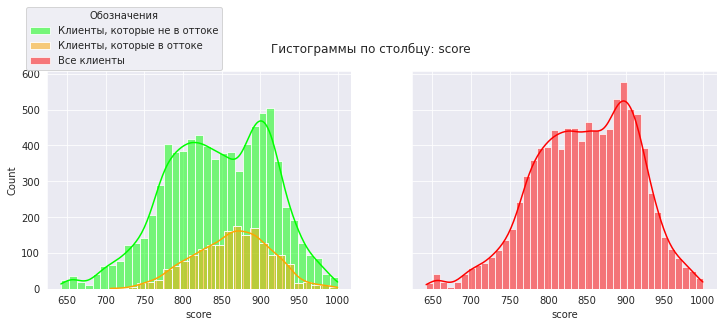

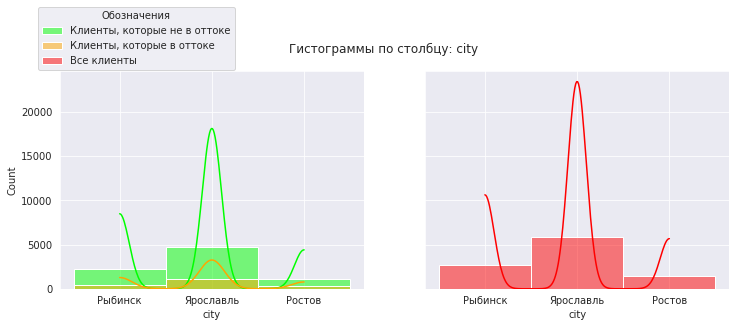

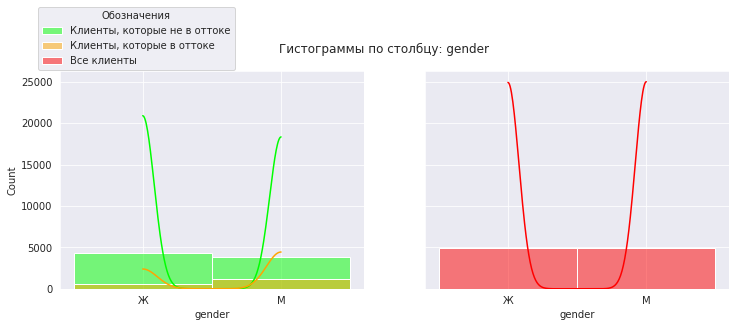

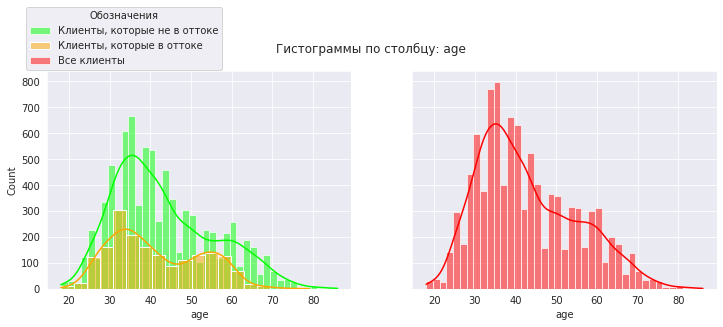

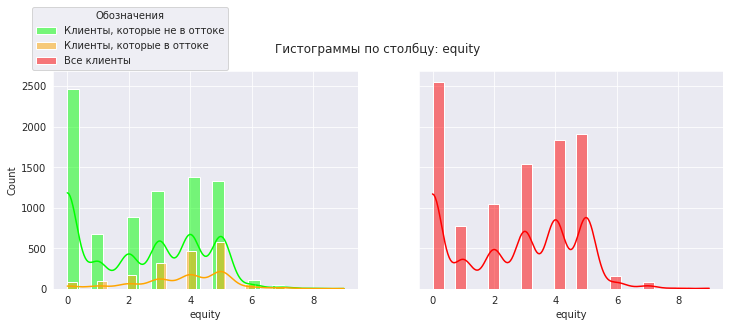

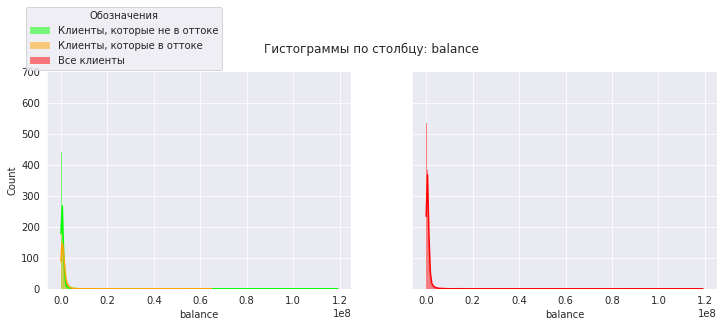

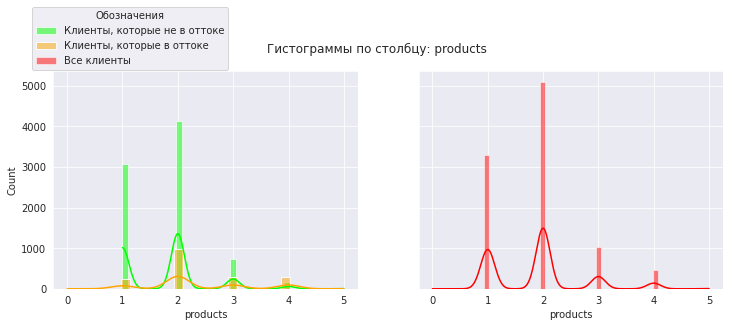

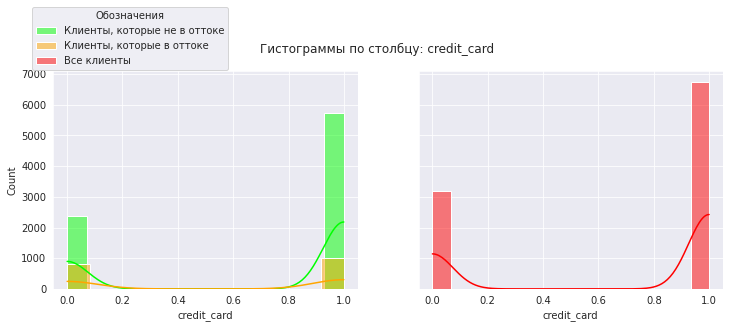

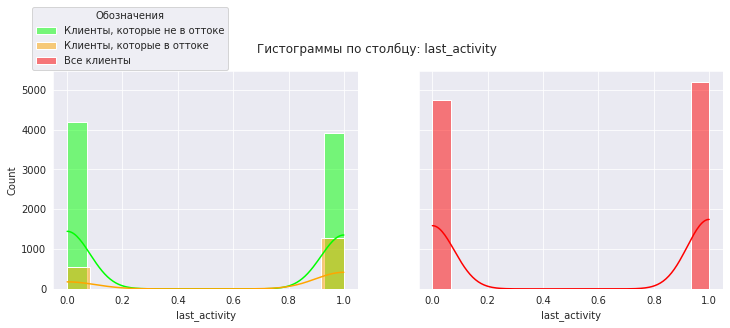

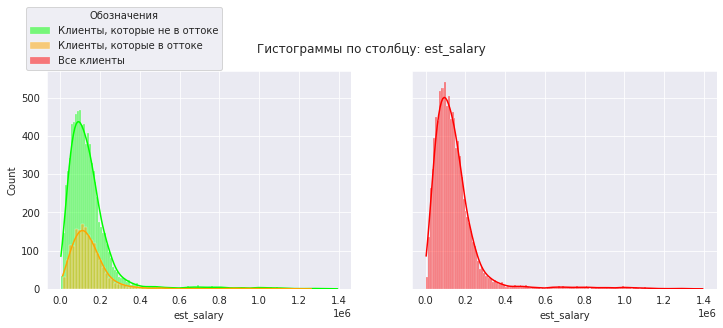

In [39]:
# Построим гистограммы

for col in (data.drop(['user_id', 'churn'], axis=1).columns): # цикл for без столбца churn
    sns.set_style('darkgrid') # задаем стиль графиков
    fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True, sharex=True) # создаем графики и настраиваем отображение осей
    fig.suptitle('Гистограммы по столбцу: ' + col) # задаем заголовки графиков
    sns.histplot(data_client[col], color='lime', ax=axes[0], label='Клиенты, которые не в оттоке', kde=True) # гистограммы клиентов, которые остались
    sns.histplot(data_outflow[col], color='orange', ax=axes[0], label = 'Клиенты, которые в оттоке', kde=True) # гистограммы клиентов, которые ушли
    sns.histplot(data[col], color='red', ax=axes[1], label='Все клиенты', kde=True) # гитограммы по общим данным
    fig.legend(bbox_to_anchor=(0.10, 0.885), title='Обозначения', loc='lower left', ncol=1, borderaxespad=0.01) # настраиваем легенду
    plt.show()

По построенным гистограммам можно сделать основные наблюдения:
* Баллы кредитного скоринга у клиентов в оттоке находятся практически в том же диапазоне, что и у клиентов не в оттоке. Клиенты которые не в оттоке по гистограмме даже имеют меньшие баллы скоринга.
* Большая часть клиентов обеих групп живет в Ярославле. На втором месте Рыбинск. На третьем месте Ростов.
* Клиентов разного пола практически одинаковое количество. Но клиентов в оттоке гораздо больше мужчин.
* Чаще всего в отток попадают клиенты в возрасте около 33 лет. Больше всего клиентов не в оттоке в возрасте в районе 35 лет.
* Больше всего количество клиентов в оттоке с 5 баллами собственности. Очень интересно. Клиентов не в оттоке больше всего с 0 баллами собственности.
* Клиенты с большим балансом на счёте принадлежат категории не в оттоке.
* Самое оптимальное количество продуктов, как у клиентов в оттоке, так и не в оттоке равняется 2.
* Количество клиентов с кредитной картой не в оттоке явно больше, чем без. А у клиентов в оттоке, количестов клиентов с кредитной картой тоже больше, но не намного.
* Клиенты в оттоке очень активные. А клиентов не в оттоке больше не активных.
* Оценочный у клиентов обеих групп приблизительно одинаков, влияет только их количество.

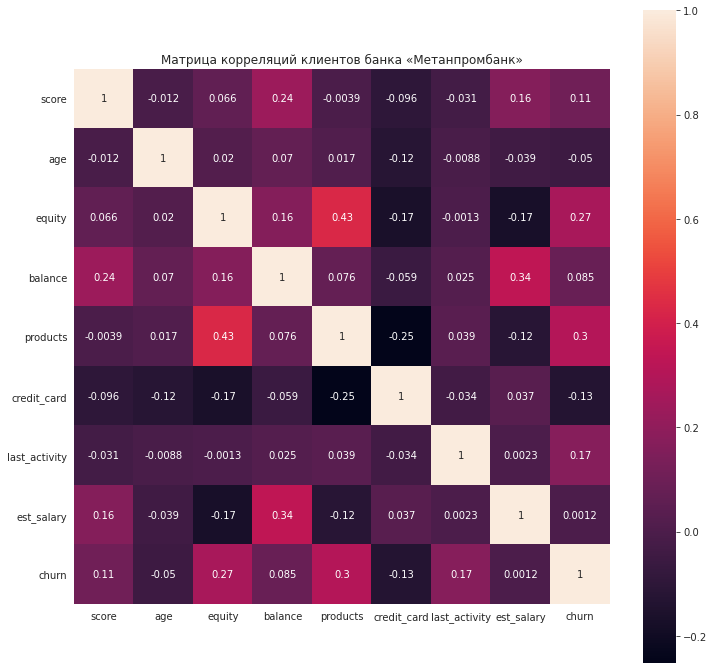

In [40]:
# построим корреляционную матрицу сначала для всего датафрейма:
corr_m_data = data.drop(['user_id'], axis=1).corr()
plt.figure(figsize = (12,12))
sns.heatmap(corr_m_data, square = True, annot = True)
plt.title('Матрица корреляций клиентов банка «Метанпромбанк»')
plt.show()

По корреляционной матрице всего датафрейма, можем сделать следующие наблюдения:
* Столбцы equity (количество баллов собственности) и products (количество продуктов, которыми пользуется клиент) обладают хорошей зависимостью 0.43.
* Столбцы balance (баланс на счёте) и est_salary (оценочный доход клиента) также обладают хорошей зависимостью 0.34.
* Неплохая корреляция между столбцами churn (признак оттока) и products (количество продуктов, которыми пользуется клиент) = 0.30.
* Также неплохая корреляция между столбцами churn (признак оттока) и equity (количество баллов собственности) = 0.27.
* Линейной зависимости, т.е. мультиколлинеарности в данных нет.
* Есть явная зависимость между оттоком клиентов с двумя признаками: количествоо продуктов, которыми пользуется клиент и количество баллов собственности.

In [41]:
# создадим датафрейм корреляционной матрицы для клиентов в оттоке
corr_m_outflow = data_outflow.drop(['user_id', 'churn'], axis=1).corr()
# создадим датафрейм корреляционной матрицы для клиентов не в оттоке
corr_m_client = data_client.drop(['user_id', 'churn'], axis=1).corr()

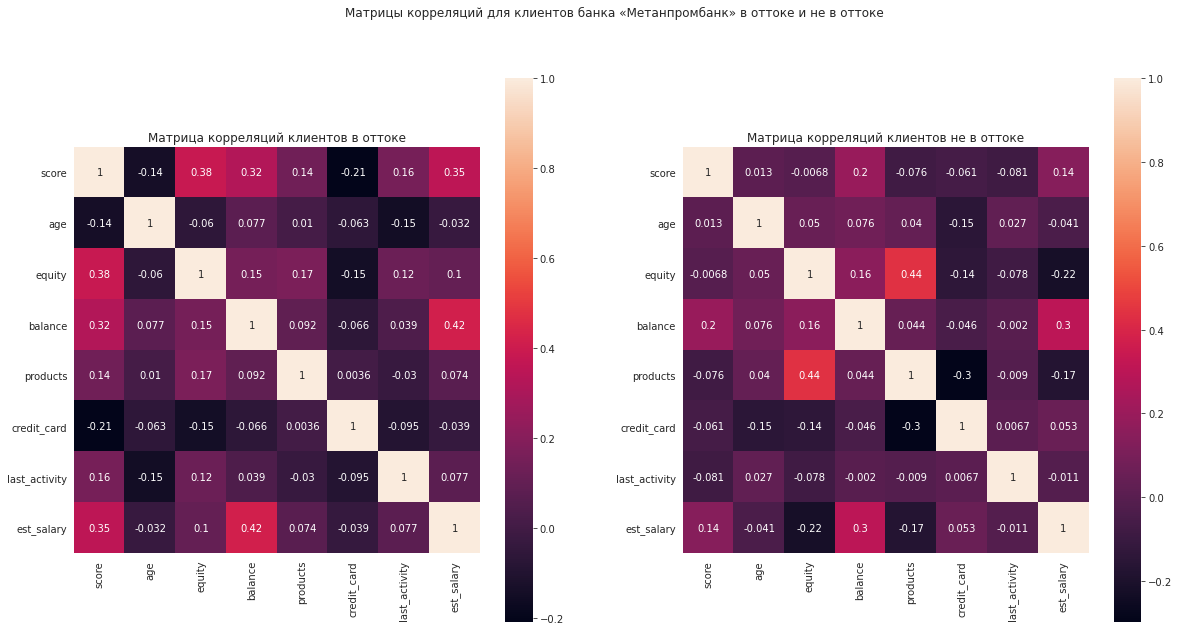

In [42]:
# Построю корреляционные матрицы для клиентов в оттоке и не в оттоке
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Матрицы корреляций для клиентов банка «Метанпромбанк» в оттоке и не в оттоке')
sns.set_palette("husl")

sns.heatmap(corr_m_outflow, square = True, annot = True, ax=ax[0])
ax[0].set_title('Матрица корреляций клиентов в оттоке')

sns.heatmap(corr_m_client, square = True, annot = True, ax=ax[1])
ax[1].set_title('Матрица корреляций клиентов не в оттоке')
plt.show()

По корреляционной матрице для клиентов в оттоке можно сделать интересные, но логичные наблюдения:
* Столбцы equity (количество баллов собственности) и score (баллы кредитного скоринга) обладают хорошей зависимостью 0.38.
* Столбцы est_salary (оценочный доход клиента) и score (баллы кредитного скоринга) обладают хорошей зависимостью 0.35.
* Столбцы balance (баланс на счёте) и score (баллы кредитного скоринга) также обладают хорошей зависимостью 0.32.
* Столбцы balance (баланс на счёте) и est_salary (оценочный доход клиента) также обладают хорошей зависимостью 0.42.
* Линейной зависимости, т.е. мультиколлинеарности в данных нет.

По корреляционной матрице для клиентов не в оттоке можно сделать интересные, но логичные наблюдения:
* Столбцы equity (количество баллов собственности) и products (количество продуктов, которыми пользуется клиент) обладают хорошей зависимостью 0.44.
* Столбцы balance (баланс на счёте) и est_salary (оценочный доход клиента) также обладают хорошей зависимостью 0.30.
* Интересна обратная корреляция между столбцами products (количество продуктов, которыми пользуется клиент) и credit_card (есть ли кредитная карта) -0.30.
* Линейной зависимости, т.е. мультиколлинеарности в данных также нет.

### 3.1. Посмотрим как влияют баллы кредитного скоринга на отточность клиентов. Найдем клиенты с какими баллами кредитного скоринга чаще попадают в отток.

In [43]:
# Найдем общие данные по столбцу score
print(f"\033[1m Клиенты в оттоке: \033[0m")
display(data_outflow['score'].describe())
print(f"\033[1m Клиенты не в оттоке: \033[0m")
display(data_client['score'].describe())

 Клиенты в оттоке: 


count    1820.000000
mean     863.401099 
std      49.611504  
min      706.000000 
25%      828.000000 
50%      866.000000 
75%      898.000000 
max      1000.000000
Name: score, dtype: float64

 Клиенты не в оттоке: 


count    8107.000000
mean     845.443691 
std      68.006608  
min      642.000000 
25%      796.000000 
50%      848.000000 
75%      900.000000 
max      1000.000000
Name: score, dtype: float64

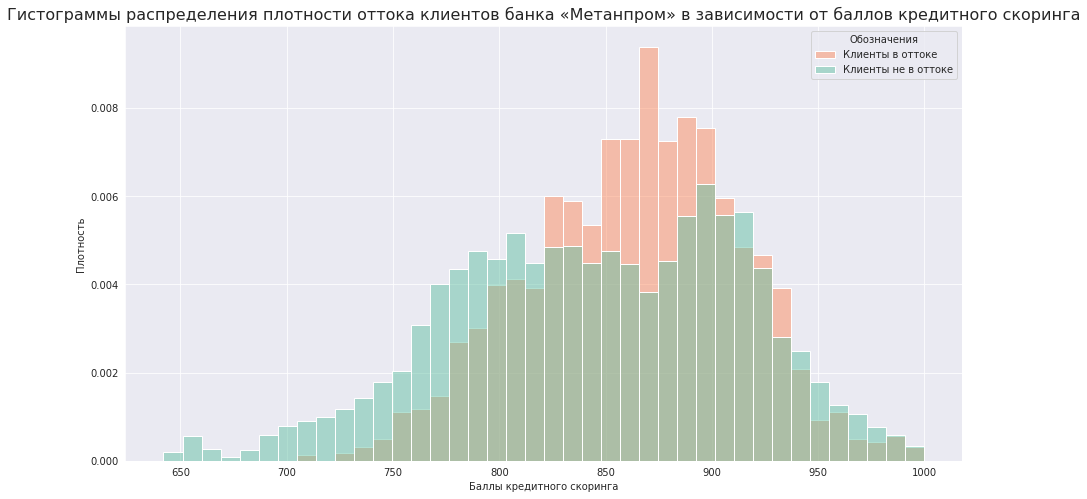

In [44]:
# Построим объединенные гистограммы распределения плотности вероятности клиентов в оттоке и не в оттоке

plt.figure(figsize=(15, 8))

sns.histplot(data=data, # данные
             x='score', # задаем переменную
             hue='churn', # добавляем категориальное измерение к гистограммам
             stat='density', # нормализуем таким образом, чтобы общая площадь гистограммы была равна 1
             common_norm=False, # используем нормализованную статистику, нормализация будет применяться ко всему набору данных
             palette='Set2' # определяем цветовую палитру
)

# Добавляем легенду
plt.legend(['Клиенты в оттоке', 'Клиенты не в оттоке'], title='Обозначения', loc='best')

# # Добавляем заголовок и отображение графика
plt.title('Гистограммы распределения плотности оттока клиентов банка «Метанпром» в зависимости от баллов кредитного скоринга'
          , fontsize=16)
plt.xlabel('Баллы кредитного скоринга')
plt.ylabel('Плотность')
plt.grid(True)
plt.show()

Клиенты чаще всего попадают в отток в диапазоне баллов кредитного скоринга от 830 до 910 баллов. Медиана: 863 балла.

### 3.2. Посмотрим как влиет город клиента на отточность. Найдем клиенты из какого города чаще попадают в отток.

In [45]:
# найду средний уровень оттока клиентов банка
churn_outflow_mean = round(data['churn'].mean(), 3)
print(f"\033[1m Средний уровень оттока клиентов банка 'Метанпром': \033[0m {churn_outflow_mean * 100} %")

 Средний уровень оттока клиентов банка 'Метанпром':  18.3 %


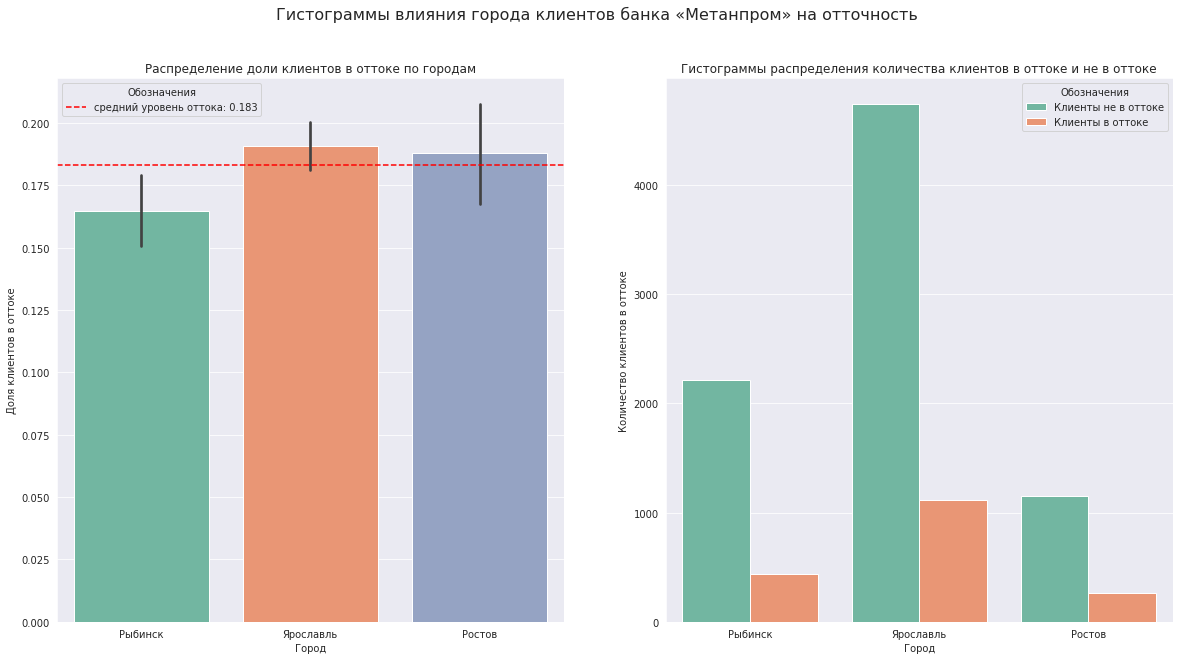

In [46]:
# Построю графики распределения клиентов банка «Метанпром» по городам
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Гистограммы влияния города клиентов банка «Метанпром» на отточность', fontsize=16)
sns.set_palette("Set2")

# первый график 
sns.barplot(data=data, x='city', y='churn', ax=ax[0])
ax[0].set_title('Распределение доли клиентов в оттоке по городам')
ax[0].set_ylabel('Доля клиентов в оттоке')
ax[0].set_xlabel('Город')
ax[0].axhline(y=churn_outflow_mean, color='red', linestyle='--', label=f'средний уровень оттока: {churn_outflow_mean}')
ax[0].legend(title='Обозначения', loc='best')

# второй график 
sns.countplot(data = data, x ='city', hue = 'churn', ax=ax[1])
ax[1].set_title('Гистограммы распределения количества клиентов в оттоке и не в оттоке')
ax[1].set_ylabel('Количество клиентов в оттоке')
ax[1].set_xlabel('Город')
ax[1].legend(['Клиенты не в оттоке', 'Клиенты в оттоке'], title='Обозначения', loc='best')
plt.show()

In [47]:
# выведу числовые данные
df_churn_city = data.pivot_table(index = 'city', values = 'churn', 
                              aggfunc = ['count', 'sum', 'mean'])
df_churn_city.columns = ['Общее кол-во клиентов', 'Количество ушедших клиентов', '% оттока']
df_churn_city.style.format({'% оттока': '{:.2%}'})

,Общее кол-во клиентов,Количество ушедших клиентов,% оттока
city,,,
Ростов,1417,266,18.77%
Рыбинск,2654,437,16.47%
Ярославль,5856,1117,19.07%


Больше всего клиентов из города Ярославль (5856). На втором месте город Рыбинск (2654) и на третьем Ростов (1417). 

Самый высокий процент оттока клиентов также в городе Ярославь (19,07%), на втором месте Ростов (18,77%) и меньше всех процент оттока клиентов в г. Рыбинск (16,47%). При среднем уровне оттока 18,3%, его соответственно превышают Ярославль и Ростов. 

### 3.3. Посмотрим как влиет пол клиента на отточность. Найдем клиенты какого пола чаще попадают в отток.

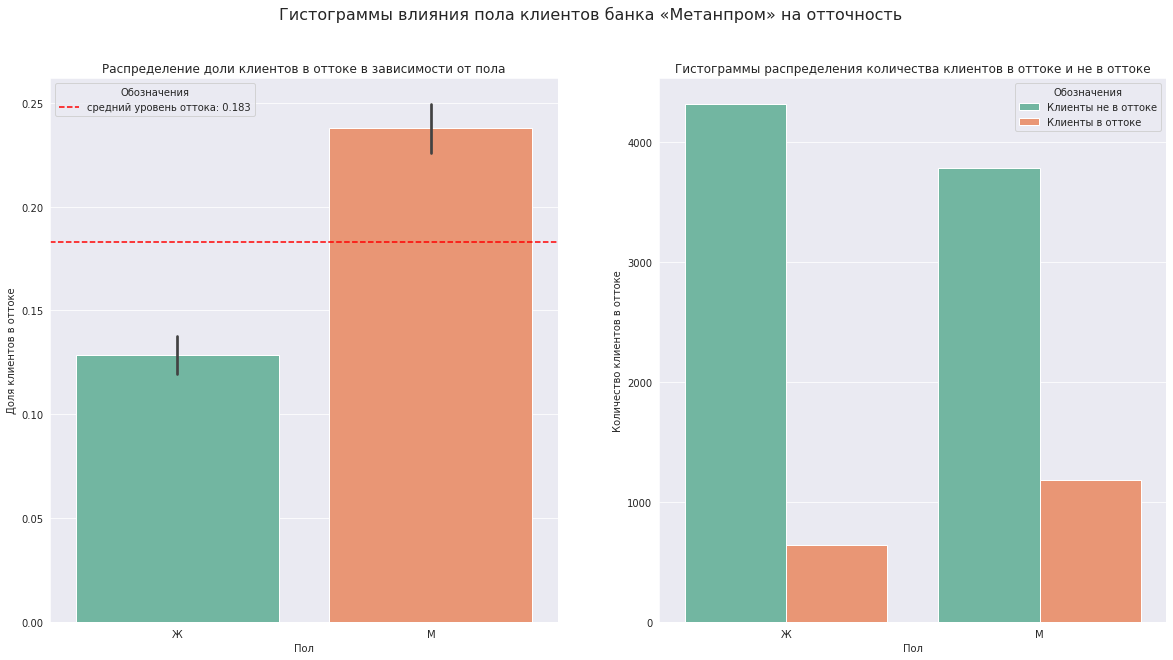

In [48]:
# Построю графики распределения клиентов банка «Метанпром» в зависимости от пола
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Гистограммы влияния пола клиентов банка «Метанпром» на отточность', fontsize=16)
sns.set_palette("Set2")

# первый график 
sns.barplot(data=data, x='gender', y='churn', ax=ax[0])
ax[0].set_title('Распределение доли клиентов в оттоке в зависимости от пола')
ax[0].set_ylabel('Доля клиентов в оттоке')
ax[0].set_xlabel('Пол')
ax[0].axhline(y=churn_outflow_mean, color='red', linestyle='--', label=f'средний уровень оттока: {churn_outflow_mean}')
ax[0].legend(title='Обозначения', loc='best')

# второй график 
sns.countplot(data = data, x ='gender', hue = 'churn', ax=ax[1])
ax[1].set_title('Гистограммы распределения количества клиентов в оттоке и не в оттоке')
ax[1].set_ylabel('Количество клиентов в оттоке')
ax[1].set_xlabel('Пол')
ax[1].legend(['Клиенты не в оттоке', 'Клиенты в оттоке'], title='Обозначения', loc='best')
plt.show()

In [49]:
# выведу числовые данные
df_churn_gender = data.pivot_table(index = 'gender', values = 'churn', 
                              aggfunc = ['count', 'sum', 'mean'])
df_churn_gender.columns = ['Общее кол-во клиентов', 'Количество ушедших клиентов', '% оттока']
df_churn_gender.style.format({'% оттока': '{:.2%}'})

,Общее кол-во клиентов,Количество ушедших клиентов,% оттока
gender,,,
Ж,4955,637,12.86%
М,4972,1183,23.79%


Клиентов обоих полов практически одинаково. Мужчин 4972 клиента, женщин 4955 клиентов. 

А вот самый высокий процент оттока клиентов мужского пола (23,79%), практически в 2 раз выше чем у женщин с 12,86% оттока. При среднем уровне оттока 18,3%, его соответственно превышают мужчины.

### 3.4. Посмотрим как влиет возраст клиента на отточность. Найдем клиенты какого возраста чаще попадают в отток.

In [50]:
# Найдем общие данные по столбцу age
print(f"\033[1m Клиенты в оттоке: \033[0m")
display(data_outflow['age'].describe())
print(f"\033[1m Клиенты не в оттоке: \033[0m")
display(data_client['age'].describe())

 Клиенты в оттоке: 


count    1820.000000
mean     41.449451  
std      11.173438  
min      18.000000  
25%      32.000000  
50%      39.000000  
75%      52.000000  
max      79.000000  
Name: age, dtype: float64

 Клиенты не в оттоке: 


count    8107.000000
mean     43.015172  
std      12.370828  
min      18.000000  
25%      34.000000  
50%      40.000000  
75%      51.000000  
max      86.000000  
Name: age, dtype: float64

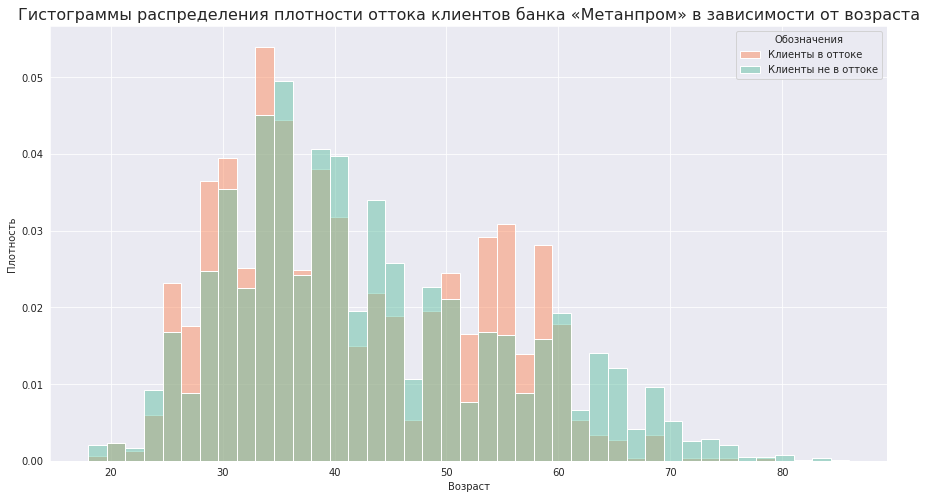

In [51]:
# Построим объединенные гистограммы распределения плотности вероятности клиентов в оттоке и не в оттоке

plt.figure(figsize=(15, 8))

sns.histplot(data=data, # данные
             x='age', # задаем переменную
             hue='churn', # добавляем категориальное измерение к гистограммам
             stat='density', # нормализуем таким образом, чтобы общая площадь гистограммы была равна 1
             common_norm=False, # используем нормализованную статистику, нормализация будет применяться ко всему набору данных
             palette='Set2' # определяем цветовую палитру
)

# Добавляем легенду
plt.legend(['Клиенты в оттоке', 'Клиенты не в оттоке'], title='Обозначения', loc='best')

# # Добавляем заголовок и отображение графика
plt.title('Гистограммы распределения плотности оттока клиентов банка «Метанпром» в зависимости от возраста'
          , fontsize=16)
plt.xlabel('Возраст')
plt.ylabel('Плотность')
plt.grid(True)
plt.show()

Больше всего клиентов попадает в отток в двух возрастных категориях:

* возраст от 25 до 35 лет;
* возраст от 50 до 60 лет.

### 3.5. Посмотрим влияет ли количество баллов собственности клиента на отточность. Найдем клиентов с каким количество баллов собственности чаще попадают в отток.

In [52]:
# Найдем общие данные по столбцу equity
print(f"\033[1m Клиенты в оттоке: \033[0m")
display(data_outflow['equity'].describe())
print(f"\033[1m Клиенты не в оттоке: \033[0m")
display(data_client['equity'].describe())

 Клиенты в оттоке: 


count    1820.000000
mean     3.763736   
std      1.585810   
min      0.000000   
25%      3.000000   
50%      4.000000   
75%      5.000000   
max      9.000000   
Name: equity, dtype: float64

 Клиенты не в оттоке: 


count    8107.000000
mean     2.381152   
std      1.970365   
min      0.000000   
25%      0.000000   
50%      3.000000   
75%      4.000000   
max      9.000000   
Name: equity, dtype: float64

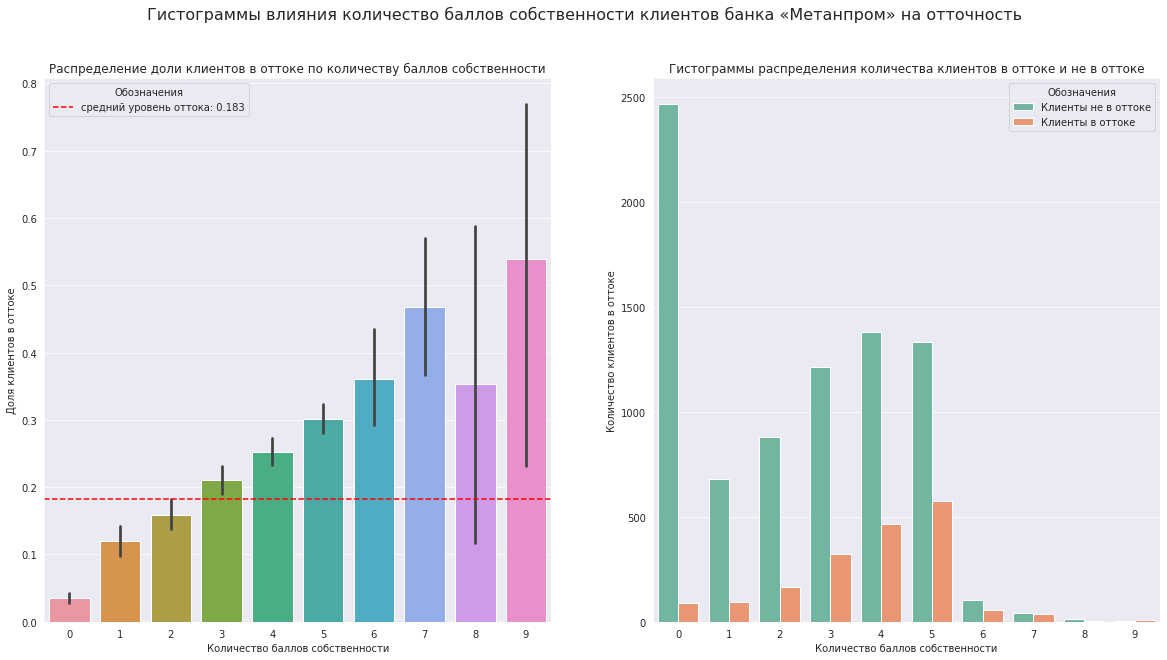

In [53]:
# Построю графики распределения клиентов банка «Метанпром» по количеству баллов собственности
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Гистограммы влияния количество баллов собственности клиентов банка «Метанпром» на отточность', fontsize=16)
sns.set_palette("Set2")

# первый график 
sns.barplot(data=data, x='equity', y='churn', ax=ax[0])
ax[0].set_title('Распределение доли клиентов в оттоке по количеству баллов собственности')
ax[0].set_ylabel('Доля клиентов в оттоке')
ax[0].set_xlabel('Количество баллов собственности')
ax[0].axhline(y=churn_outflow_mean, color='red', linestyle='--', label=f'средний уровень оттока: {churn_outflow_mean}')
ax[0].legend(title='Обозначения', loc='best')

# второй график 
sns.countplot(data = data, x ='equity', hue = 'churn', ax=ax[1])
ax[1].set_title('Гистограммы распределения количества клиентов в оттоке и не в оттоке')
ax[1].set_ylabel('Количество клиентов в оттоке')
ax[1].set_xlabel('Количество баллов собственности')
ax[1].legend(['Клиенты не в оттоке', 'Клиенты в оттоке'], title='Обозначения', loc='best')
plt.show()

In [54]:
# выведу числовые данные
df_churn_equity = data.pivot_table(index = 'equity', values = 'churn', 
                              aggfunc = ['count', 'sum', 'mean'])
df_churn_equity.columns = ['Общее кол-во клиентов', 'Количество ушедших клиентов', '% оттока']
df_churn_equity.sort_values(by='% оттока', ascending=False).style.format({'% оттока': '{:.2%}'})

,Общее кол-во клиентов,Количество ушедших клиентов,% оттока
equity,,,
9,13,7,53.85%
7,79,37,46.84%
6,161,58,36.02%
8,17,6,35.29%
5,1911,577,30.19%
4,1841,464,25.20%
3,1533,322,21.00%
2,1046,166,15.87%
1,772,93,12.05%


По полученным гистограммам, видим, что оптимальное количество баллов собственности у клиентов от 0 до 2. А начиная 3 баллов собственности и чем больше, тем вероятнее клиент попадает в отток.

Самый высокий процент оттока клиентов с 9 баллами собственности (53,85%), на втором месте 7 баллов (46,84%), на третьем 6 баллов (36,02%).

Меньше всех процент оттока клиентов с 0 баллами собственности (3,52%). 

При среднем уровне оттока 18,3%, его соответственно превышают все группы начиная с 3 и до 9 баллов собственности включительно.

### 3.6. Посмотрим влияет ли баланс на счёте клиента на отточность. Найдем клиентов с каким балансом на счёте чаще попадают в отток.

In [55]:
# Найдем общие данные по столбцу balance
print(f"\033[1m Клиенты в оттоке: \033[0m")
display(data_outflow['balance'].describe())
print(f"\033[1m Клиенты не в оттоке: \033[0m")
display(data_client['balance'].describe())

 Клиенты в оттоке: 


count    1.807000e+03
mean     1.133993e+06
std      2.033978e+06
min      6.000000e+00
25%      3.872183e+05
50%      7.824105e+05
75%      1.348101e+06
max      6.486621e+07
Name: balance, dtype: float64

 Клиенты не в оттоке: 


count    5.860000e+03
mean     7.348230e+05
std      1.960631e+06
min      0.000000e+00
25%      2.786464e+05
50%      4.753524e+05
75%      8.538599e+05
max      1.191136e+08
Name: balance, dtype: float64

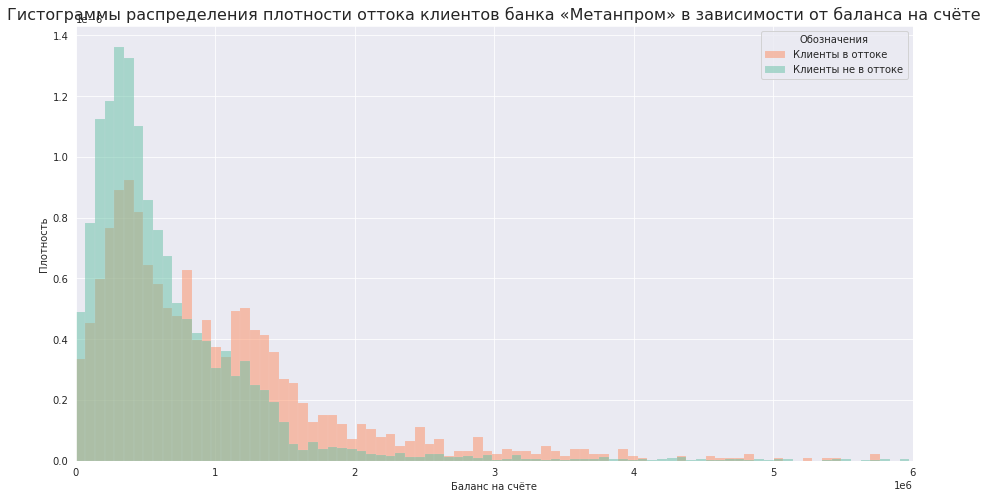

In [56]:
# Построим объединенные гистограммы распределения плотности вероятности клиентов в оттоке и не в оттоке

plt.figure(figsize=(15, 8))

sns.histplot(data=data, # данные
             x='balance', # задаем переменную
             hue='churn', # добавляем категориальное измерение к гистограммам
             stat='density', # нормализуем таким образом, чтобы общая площадь гистограммы была равна 1
             common_norm=False, # используем нормализованную статистику, нормализация будет применяться ко всему набору данных
             palette='Set2' # определяем цветовую палитру
)

# Добавляем легенду
plt.legend(['Клиенты в оттоке', 'Клиенты не в оттоке'], title='Обозначения', loc='best')

# # Добавляем заголовок и отображение графика
plt.title('Гистограммы распределения плотности оттока клиентов банка «Метанпром» в зависимости от баланса на счёте'
          , fontsize=16)
plt.xlabel('Баланс на счёте')
plt.ylabel('Плотность')
plt.xlim(0, 6000000)
plt.grid(True)
plt.show()

По построенной гистограмме, видим, что при балансе на счете от 1 млн. руб. клиенты очень часто попадают в отток. Также отток клиентов проявляется при балансе около 0,8 млн. руб.

### 3.7. Посмотрим влияет ли количество продуктов, которыми пользуется клиент на отточность. Найдем клиентов с каким количеством продуктов банка чаще попадают в отток.

In [57]:
# Найдем общие данные по столбцу products
print(f"\033[1m Клиенты в оттоке: \033[0m")
display(data_outflow['products'].describe())
print(f"\033[1m Клиенты не в оттоке: \033[0m")
display(data_client['products'].describe())

 Клиенты в оттоке: 


count    1820.000000
mean     2.375824   
std      0.923380   
min      0.000000   
25%      2.000000   
50%      2.000000   
75%      3.000000   
max      5.000000   
Name: products, dtype: float64

 Клиенты не в оттоке: 


count    8107.000000
mean     1.758357   
std      0.713241   
min      1.000000   
25%      1.000000   
50%      2.000000   
75%      2.000000   
max      5.000000   
Name: products, dtype: float64

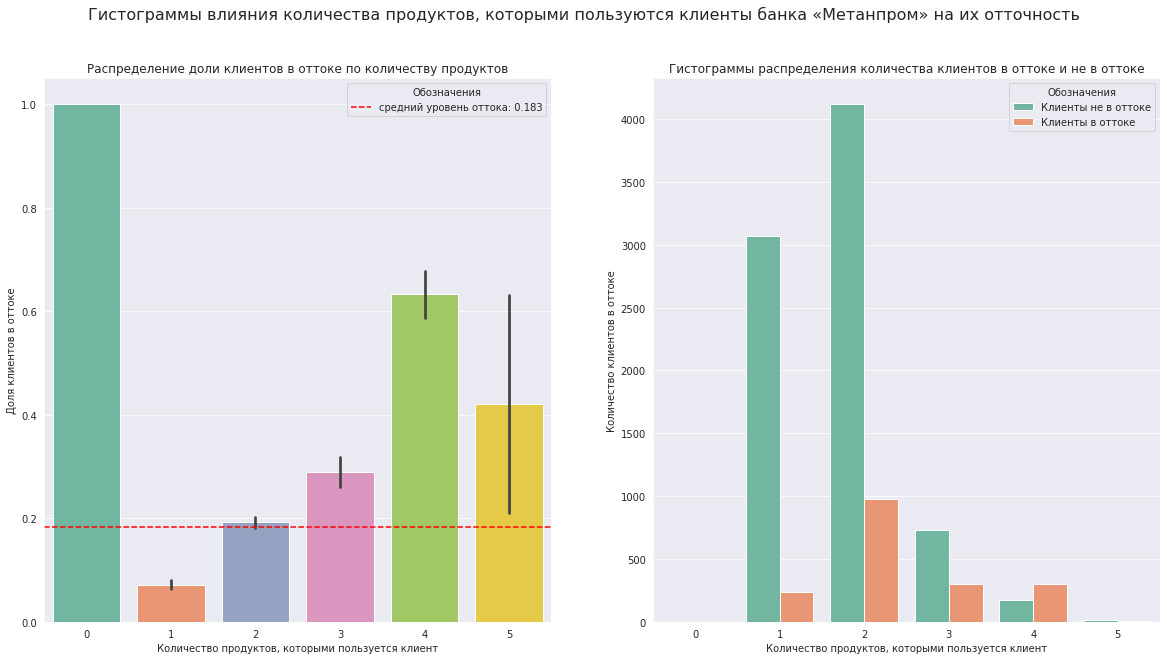

In [58]:
# Построю графики распределения клиентов банка «Метанпром» по количеству продуктов, которыми пользуется клиент
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Гистограммы влияния количества продуктов, которыми пользуются клиенты банка «Метанпром» на их отточность', fontsize=16)
sns.set_palette("Set2")

# первый график 
sns.barplot(data=data, x='products', y='churn', ax=ax[0])
ax[0].set_title('Распределение доли клиентов в оттоке по количеству продуктов')
ax[0].set_ylabel('Доля клиентов в оттоке')
ax[0].set_xlabel('Количество продуктов, которыми пользуется клиент')
ax[0].axhline(y=churn_outflow_mean, color='red', linestyle='--', label=f'средний уровень оттока: {churn_outflow_mean}')
ax[0].legend(title='Обозначения', loc='best')

# второй график 
sns.countplot(data = data, x ='products', hue = 'churn', ax=ax[1])
ax[1].set_title('Гистограммы распределения количества клиентов в оттоке и не в оттоке')
ax[1].set_ylabel('Количество клиентов в оттоке')
ax[1].set_xlabel('Количество продуктов, которыми пользуется клиент')
ax[1].legend(['Клиенты не в оттоке', 'Клиенты в оттоке'], title='Обозначения', loc='best')
plt.show()

In [59]:
# выведу числовые данные
df_churn_equity = data.pivot_table(index = 'products', values = 'churn', 
                              aggfunc = ['count', 'sum', 'mean'])
df_churn_equity.columns = ['Общее кол-во клиентов', 'Количество ушедших клиентов', '% оттока']
df_churn_equity.sort_values(by='% оттока', ascending=True).style.format({'% оттока': '{:.2%}'})

,Общее кол-во клиентов,Количество ушедших клиентов,% оттока
products,,,
1,3306,235,7.11%
2,5099,979,19.20%
3,1028,297,28.89%
5,19,8,42.11%
4,474,300,63.29%
0,1,1,100.00%


По полученным гистограммам, видим, что оптимальное количество продуктов, которыми пользуется клиент от 1 до 2. А начиная 3 продуктов и больше, вероятность попадания клиента в отток возрастает.

Самый высокий процент оттока клиентов с 4 продуктами (63,29%), на втором месте с 5 продуктами (42,11%) и на на третьем месте 3 продукта (28,89%). Клиент, который не пользуется никакими продуктами банка всего 1 и то попал в отток. Жалко, что-то в этом было...

Меньше всех процент оттока клиентов с 1 продуктом банка (7,11%), это вторая по многочисленности с 3306 клиентами. 

При среднем уровне оттока 18,3%, его соответственно превышают все группы начиная с 2 (очень погранично и превышение всего на 0,9%) и до 5 продуктов банка включительно. А также превышает 1 клиент, который не пользуется продуктами и ушел в отток.

### 3.8. Посмотрим влияет ли наличие кредитной карты у клиента на отточность.

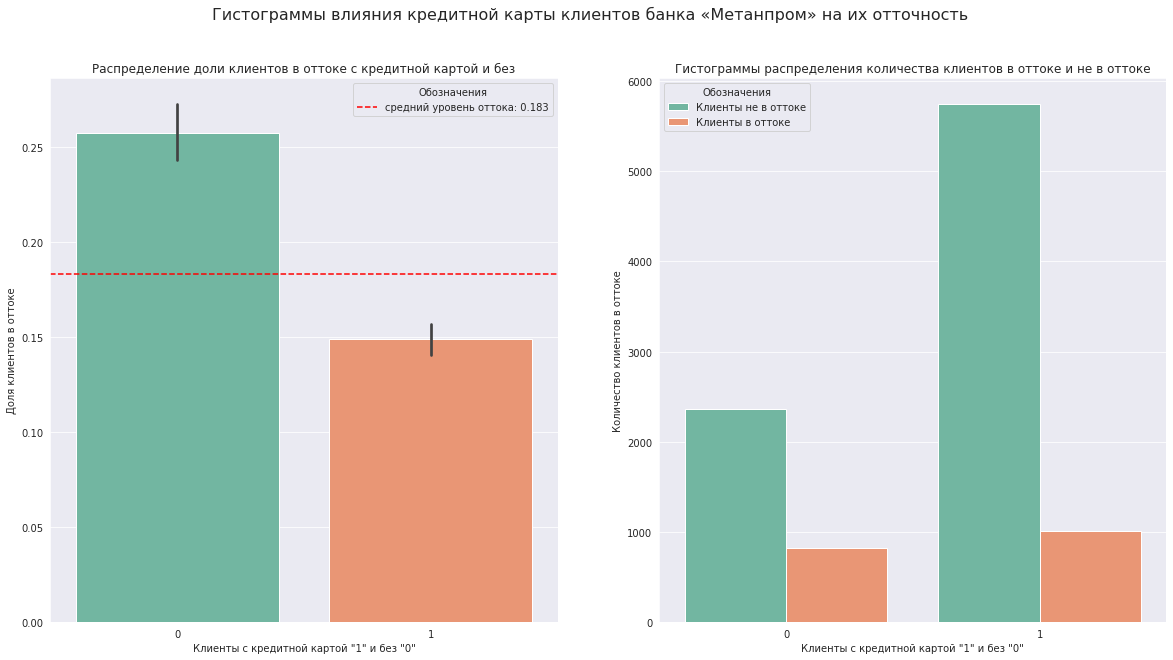

In [60]:
# Построю графики распределения клиентов банка «Метанпром» с кредитной картой и без и ее лияние на отток
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Гистограммы влияния кредитной карты клиентов банка «Метанпром» на их отточность', fontsize=16)
sns.set_palette("Set2")

# первый график 
sns.barplot(data=data, x='credit_card', y='churn', ax=ax[0])
ax[0].set_title('Распределение доли клиентов в оттоке с кредитной картой и без')
ax[0].set_ylabel('Доля клиентов в оттоке')
ax[0].set_xlabel('Клиенты с кредитной картой "1" и без "0"')
ax[0].axhline(y=churn_outflow_mean, color='red', linestyle='--', label=f'средний уровень оттока: {churn_outflow_mean}')
ax[0].legend(title='Обозначения', loc='best')

# второй график 
sns.countplot(data = data, x ='credit_card', hue = 'churn', ax=ax[1])
ax[1].set_title('Гистограммы распределения количества клиентов в оттоке и не в оттоке')
ax[1].set_ylabel('Количество клиентов в оттоке')
ax[1].set_xlabel('Клиенты с кредитной картой "1" и без "0"')
ax[1].legend(['Клиенты не в оттоке', 'Клиенты в оттоке'], title='Обозначения', loc='best')
plt.show()

In [61]:
# выведу числовые данные
df_churn_equity = data.pivot_table(index = 'credit_card', values = 'churn', 
                              aggfunc = ['count', 'sum', 'mean'])
df_churn_equity.columns = ['Общее кол-во клиентов', 'Количество ушедших клиентов', '% оттока']
df_churn_equity.sort_values(by='% оттока', ascending=True).style.format({'% оттока': '{:.2%}'})

,Общее кол-во клиентов,Количество ушедших клиентов,% оттока
credit_card,,,
1,6749,1003,14.86%
0,3178,817,25.71%


Клиентов с кредитной картой больше. 6749 клиентов с кредитной, против 3178 клиентов без кредитной карты. 

Высокий процент оттока у клиентов без кредитной карты (25,71%). У клиентов с кредитной картой процент оттока 14,86%. При среднем уровне оттока 18,3%, его соответственно превышают клиенты без кредитной карты.

### 3.9. Посмотрим влияет ли активность клиента на отточность.

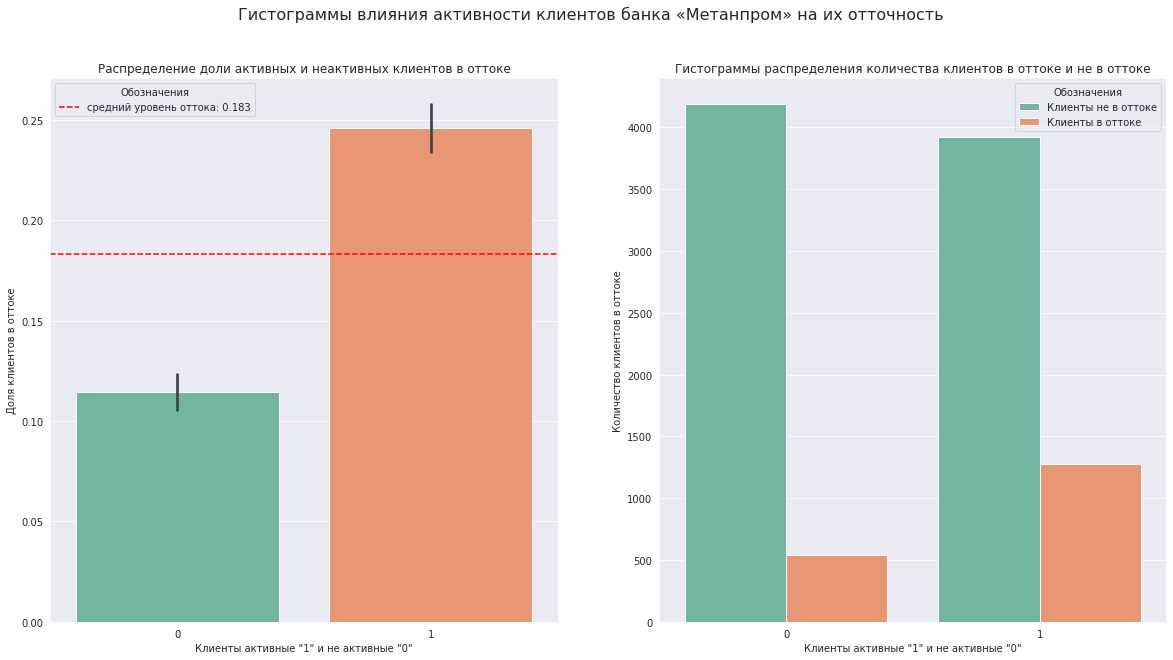

In [62]:
# Построю графики распределения активности клиентов банка «Метанпром» и ее лияние на отток
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Гистограммы влияния активности клиентов банка «Метанпром» на их отточность', fontsize=16)
sns.set_palette("Set2")

# первый график 
sns.barplot(data=data, x='last_activity', y='churn', ax=ax[0])
ax[0].set_title('Распределение доли активных и неактивных клиентов в оттоке')
ax[0].set_ylabel('Доля клиентов в оттоке')
ax[0].set_xlabel('Клиенты активные "1" и не активные "0"')
ax[0].axhline(y=churn_outflow_mean, color='red', linestyle='--', label=f'средний уровень оттока: {churn_outflow_mean}')
ax[0].legend(title='Обозначения', loc='best')

# второй график 
sns.countplot(data = data, x ='last_activity', hue = 'churn', ax=ax[1])
ax[1].set_title('Гистограммы распределения количества клиентов в оттоке и не в оттоке')
ax[1].set_ylabel('Количество клиентов в оттоке')
ax[1].set_xlabel('Клиенты активные "1" и не активные "0"')
ax[1].legend(['Клиенты не в оттоке', 'Клиенты в оттоке'], title='Обозначения', loc='best')
plt.show()

In [63]:
# выведу числовые данные
df_churn_equity = data.pivot_table(index = 'last_activity', values = 'churn', 
                              aggfunc = ['count', 'sum', 'mean'])
df_churn_equity.columns = ['Общее кол-во клиентов', 'Количество ушедших клиентов', '% оттока']
df_churn_equity.sort_values(by='% оттока', ascending=True).style.format({'% оттока': '{:.2%}'})

,Общее кол-во клиентов,Количество ушедших клиентов,% оттока
last_activity,,,
0,4730,542,11.46%
1,5197,1278,24.59%


Активных клиентов немного больше. 5179 активных клиентов против 4730 не активных клиентов. 

Высокий процент оттока у активных клиентов (24,59%). У клиентов не активных процент оттока 11,46%. При среднем уровне оттока 18,3%, его соответственно превышают активные клиенты.

### 3.10. Посмотрим влияет ли оценочный доход клиента на отточность. Найдем клиентов с каким оценочным доходом чаще попадают в отток.

In [64]:
# Найдем общие данные по столбцу est_salary
print(f"\033[1m Клиенты в оттоке: \033[0m")
display(data_outflow['est_salary'].describe())
print(f"\033[1m Клиенты не в оттоке: \033[0m")
display(data_client['est_salary'].describe())

 Клиенты в оттоке: 


count    1.820000e+03
mean     1.482430e+05
std      1.229145e+05
min      1.088027e+04
25%      8.311132e+04
50%      1.253906e+05
75%      1.759529e+05
max      1.263028e+06
Name: est_salary, dtype: float64

 Клиенты не в оттоке: 


count    8.107000e+03
mean     1.478125e+05
std      1.428057e+05
min      2.546300e+03
25%      7.350065e+04
50%      1.182472e+05
75%      1.741243e+05
max      1.395064e+06
Name: est_salary, dtype: float64

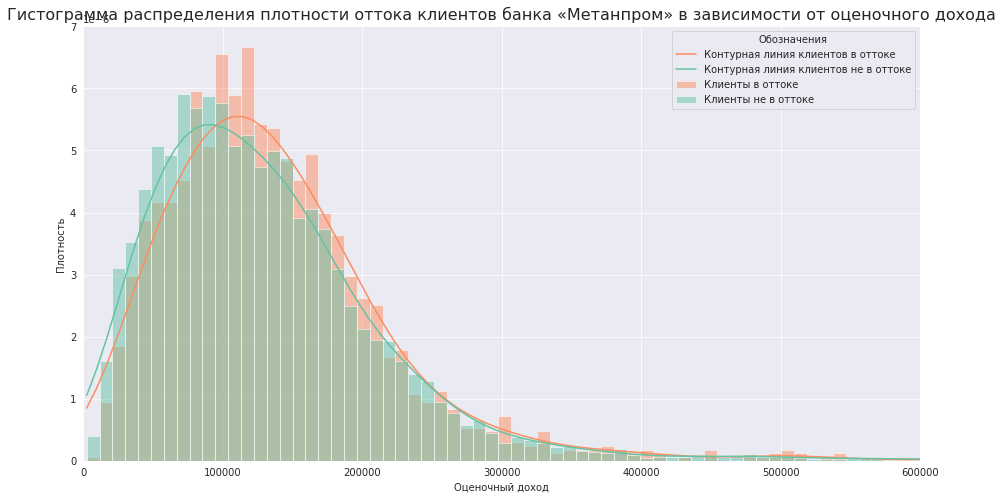

In [65]:
# Построим объединенные гистограммы распределения плотности вероятности клиентов в оттоке и не в оттоке

plt.figure(figsize=(15, 8))

sns.histplot(data=data, # данные
             x='est_salary', # задаем переменную
             hue='churn', # добавляем категориальное измерение к гистограммам
             stat='density', # нормализуем таким образом, чтобы общая площадь гистограммы была равна 1
             common_norm=False, # используем нормализованную статистику, нормализация будет применяться ко всему набору данных
             palette='Set2', # определяем цветовую палитру
             kde=True # вычислим оценку плотности ядра, чтобы сгладить распределение и отобразить на графике в виде линий
)

# Добавляем легенду
plt.legend(['Контурная линия клиентов в оттоке', 'Контурная линия клиентов не в оттоке', 'Клиенты в оттоке', 'Клиенты не в оттоке'], title='Обозначения', loc='best')

# # Добавляем заголовок и отображение графика
plt.title('Гистограмма распределения плотности оттока клиентов банка «Метанпром» в зависимости от оценочного дохода'
          , fontsize=16)
plt.xlabel('Оценочный доход')
plt.ylabel('Плотность')
plt.xlim(0, 600000)
plt.grid(True)
plt.show()

По построенной гистограмме, видим, что при оценочном доходе от 100 тыс. до 220 тыс. руб. клиенты очень часто попадают в отток. Также клиенты часто попадают в отток при оценочном доходе в 300 тыс. руб.

### 3.11. Составим портреты клиентов, которые склонны уходить из банка и которые не склонны

`Портрет клиентов, которые склонны уходить из банка:`
* баллы кредитного скоринга в диапазоне от 830 до 910;
* из города Ярославль;
* чаще мужчины;
* возраст от 25 до 35 лет и от 50 до 60;
* количество баллов собственности от 3 и выше;
* баланс на счете 0,8 млн. руб. и от 1 млн. руб. и выше;
* использование 2-х продуктов банка и больше;
* без кредитной карты;
* активный клиент;
* оценочный доход от 100 тыс. до 220 тыс. руб. и при 300 тыс. руб.

`Портрет клиентов, которые не склонны уходить из банка:`
* баллы кредитного скоринга в диапазоне от 650 до 830;
* из города Рыбинск;
* чаще женщины;
* возраст от 35 до 50 лет и от 60 выше;
* количество баллов собственности до 3;
* диапазон баланса на счете от 0 до 1 млн руб., за исключением баланса около 0,8 млн. руб.;
* использование до 2-х продуктов банка;
* С кредитной картой;
* Не активный клиент;
* оценочный доход до 100 тыс. руб.

### 3.12. Промежуточные выводы

Промежуточный вывод:

* По матрице корреляций наибольшая зависимость наблюдается между оттоком клиентов и количеством продуктов (0,30), количеством баллов собственности (0,27), активностью клиента (0,17) и баллами кредитного скоринга (0,11).
* Клиенты попадают в отток, которые активно ипользуют не менее 2-х продуктов банка, у клиентов от 3-х и выше баллов собственности, баллы кредитного скоринга находятся в диапазоне от 830 до 910.
* Клиенты не попадают в отток, которые не активные, ипользуют до 2-х продуктов банка, у клиентов меньше 3-х баллов собственности, баллы кредитного скоринга находятся в диапазоне от 650 до 830 и от 910 и выше.
* Средний уровень оттока клиентов банка 'Метанпром':  18.3 %

В результате исследовательского анализа, делаем следующие промежуточные выводы:

* создал 2 новых датафрейма с клиентами, которые попадают в отток и с клиентами, которые не попадают в отток;
* процент клиентов в оттоке:  18.33 %
* процент клиентов не в оттоке:  81.67 %

По построенным сравнительным гистограммам сделал основные наблюдения:
* Баллы кредитного скоринга у клиентов в оттоке находятся практически в том же диапазоне, что и у клиентов не в оттоке. Клиенты которые не в оттоке по гистограмме даже имеют меньшие баллы скоринга.
* Большая часть клиентов обеих групп живет в Ярославле. На втором месте Рыбинск. На третьем месте Ростов.
* Клиентов разного пола практически одинаковое количество. Но клиентов в оттоке гораздо больше мужчин.
* Чаще всего в отток попадают клиенты в возрасте около 33 лет. Больше всего клиентов не в оттоке в возрасте в районе 35 лет.
* Больше всего количество клиентов в оттоке с 5 баллами собственности. Очень интересно. Клиентов не в оттоке больше всего с 0 баллами собственности.
* Клиенты с большим балансом на счёте принадлежат категории не в оттоке.
* Самое оптимальное количество продуктов, как у клиентов в оттоке, так и не в оттоке равняется 2.
* Количество клиентов с кредитной картой не в оттоке явно больше, чем без. А у клиентов в оттоке, количестов клиентов с кредитной картой тоже больше, но не намного.
* Клиенты в оттоке очень активные. А клиентов не в оттоке больше не активных.
* Оценочный у клиентов обеих групп приблизительно одинаков, влияет только их количество.

По корреляционной матрице всего датафрейма, сделал следующие наблюдения:
* Столбцы equity (количество баллов собственности) и products (количество продуктов, которыми пользуется клиент) обладают хорошей зависимостью 0.43.
* Столбцы balance (баланс на счёте) и est_salary (оценочный доход клиента) также обладают хорошей зависимостью 0.34.
* Неплохая корреляция между столбцами churn (признак оттока) и products (количество продуктов, которыми пользуется клиент) = 0.30.
* Также неплохая корреляция между столбцами churn (признак оттока) и equity (количество баллов собственности) = 0.27.
* Линейной зависимости, т.е. мультиколлинеарности в данных нет.
* Есть явная зависимость между оттоком клиентов с двумя признаками: количеством продуктов, которыми пользуется клиент и количество баллов собственности.

По корреляционной матрице для клиентов в оттоке сделал интересные, но логичные наблюдения:
* Столбцы equity (количество баллов собственности) и score (баллы кредитного скоринга) обладают хорошей зависимостью 0.38.
* Столбцы est_salary (оценочный доход клиента) и score (баллы кредитного скоринга) обладают хорошей зависимостью 0.35.
* Столбцы balance (баланс на счёте) и score (баллы кредитного скоринга) также обладают хорошей зависимостью 0.32.
* Столбцы balance (баланс на счёте) и est_salary (оценочный доход клиента) также обладают хорошей зависимостью 0.42.
* Линейной зависимости, т.е. мультиколлинеарности в данных нет.

По корреляционной матрице для клиентов не в оттоке сделал интересные, но логичные наблюдения:
* Столбцы equity (количество баллов собственности) и products (количество продуктов, которыми пользуется клиент) обладают хорошей зависимостью 0.44.
* Столбцы balance (баланс на счёте) и est_salary (оценочный доход клиента) также обладают хорошей зависимостью 0.30.
* Интересна обратная корреляция между столбцами products (количество продуктов, которыми пользуется клиент) и credit_card (есть ли кредитная карта) -0.30.
* Линейной зависимости, т.е. мультиколлинеарности в данных также нет.

В результате исследовательского анализа по столбцам, делаю следующие выводы:

`score - баллы кредитного скоринга`

    * Клиенты чаще всего попадают в отток в диапазоне баллов кредитного скоринга от 830 до 910 баллов. Медиана: 863 балла.

`city - город`

    * Средний уровень оттока клиентов банка 'Метанпром':  18.3 %
    * Больше всего клиентов из города Ярославль (5856). На втором месте город Рыбинск (2654) и на третьем Ростов (1417);
    * Самый высокий процент оттока клиентов также в городе Ярославь (19,07%), на втором месте Ростов (18,77%) и меньше всех процент оттока клиентов в г. Рыбинск (16,47%). При среднем уровне оттока 18,3%, его соответственно превышают Ярославль и Ростов.

`gender - пол`

    * Клиентов обоих полов практически одинаково. Мужчин 4972 клиента, женщин 4955 клиентов.
    * А вот самый высокий процент оттока клиентов мужского пола (23,79%), практически в 2 раз выше чем у женщин с 12,86% оттока. При среднем уровне оттока 18,3%, его превышают соответственно мужчины.

`age - возраст`

Больше всего клиентов попадает в отток в двух возрастных категориях:

    * от 25 до 35 лет;
    * от 50 до 60 лет.

`equity - количество баллов собственности`

    * По полученным гистограммам, видим, что оптимальное количество баллов собственности у клиентов от 0 до 2. А начиная 3 баллов собственности и чем больше, тем вероятнее клиент попадает в отток.
    * Самый высокий процент оттока клиентов с 9 баллами собственности (53,85%), на втором месте 7 баллов (46,84%), на третьем 6 баллов (36,02%).
    * Меньше всех процент оттока клиентов с 0 баллами собственности (3,52%). 
    * При среднем уровне оттока 18,3%, его соответственно превышают все группы начиная с 3 и до 9 баллов собственности включительно.

`balance - баланс на счёте`

    * По построенной гистограмме, видим, что при балансе на счете от 1 млн. руб. клиенты очень часто попадают в отток. Также отток клиентов проявляется при балансе около 0,8 млн. руб.

`products - количество продуктов, которыми пользуется клиент`

    * По полученным гистограммам, видим, что оптимальное количество продуктов, которыми пользуется клиент от 1 до 2. А начиная 3 продуктов и больше, вероятность попадания клиента в отток возрастает.
    * Самый высокий процент оттока клиентов с 4 продуктами (63,29%), на втором месте с 5 продуктами (42,11%) и на на третьем месте 3 продукта (28,89%). Клиент, который не пользуется никакими продуктами банка всего 1 и то попал в отток. Жалко, что-то в этом было...
    * Меньше всех процент оттока клиентов с 1 продуктом банка (7,11%), это вторая по многочисленности с 3306 клиентами. 
    * При среднем уровне оттока 18,3%, его соответственно превышают все группы начиная с 2 (очень погранично и превышение всего на 0,9%) и до 5 продуктов банка включительно. А также превышает 1 клиент, который не пользуется продуктами и ушел в отток.

`credit_card - есть ли кредитная карта`

    * Клиентов с кредитной картой больше. 6749 клиентов с кредитной, против 3178 клиентов без кредитной карты. 
    * Высокий процент оттока у клиентов без кредитной карты (25,71%). У клиентов с кредитной картой процент оттока 14,86%. При среднем уровне оттока 18,3%, его соответственно превышают клиенты без кредитной карты.

`last_activity - активный клиент`

    * Активных клиентов немного больше. 5179 активных клиентов против 4730 не активных клиентов. 
    * Высокий процент оттока у активных клиентов (24,59%). У клиентов не активных процент оттока 11,46%. При среднем уровне оттока 18,3%, его соответственно превышают активные клиенты.

`est_salary - оценочный доход клиента`

    * По построенной гистограмме, видим, что при оценочном доходе от 100 тыс. до 220 тыс. руб. клиенты очень часто попадают в отток. Также клиенты часто попадают в отток при оценочном доходе в 300 тыс. руб.

## Шаг 4. Сегментация клиентов оттока

### 4.1. Объединим признаки отточности и сформируем сегменты. 

На основании проделанного выше исследовательского анализа матрицы корреляций выявил, что сильнее всего влияют на отточность клиентов:
* количество продуктов, которыми пользуется клиент products (0,30);
* количеством баллов собственности equity (0,27);
* активность клиента last_activity (0,17) ;
* баллы кредитного скоринга score (0,11);
* Баланс на счёте balance (0.085).

На основании выявленных закономерностей и портрета отточных клиентов буду выделять сегменты.

`Портрет клиентов с параметрами наибольшей корреляции клиентов склонных уходить из банка:`
* баллы кредитного скоринга score в диапазоне от 830 до 910;
* количество баллов собственности equity от 3 и выше;
* баланс на счете balance 0,8 млн. руб. и от 1 млн. руб. и выше;
* использование 2-х продуктов банка products и больше.

Составлю сегменты. В рамках данного проекта и чтобы не мельчить сегменты, условно принимаю, что критериев для каждого сегмента должно быть не больше 3. А размер сегмента от 400 до 2000 клиентов.

In [66]:
data_segm_1 = data.query('products > 2 and equity > 3 and last_activity == 1')
print(f"\033[1m Сегмент 1. Активные клиенты, использующие не менее 2-х продуктов банка, с количество баллов собственности не менее 3. \033[0m")

print(f"\033[1m Общее количество клиентов: \033[0m {data_segm_1['user_id'].count()}")
print(f"\033[1m Количество клиентов в оттоке: \033[0m {data_segm_1[data_segm_1['churn'] == 1]['churn'].count()}")
print(f"\033[1m Процент оттока: \033[0m {round(data_segm_1['churn'].mean()*100, 2)} %")

 Сегмент 1. Активные клиенты, использующие не менее 2-х продуктов банка, с количество баллов собственности не менее 3. 
 Общее количество клиентов:  531
 Количество клиентов в оттоке:  279
 Процент оттока:  52.54 %


In [67]:
data_segm_2 = data.query('products > 2 and equity > 3 and score > 830 and score < 910')
print(f"\033[1m Сегмент 2. Клиенты, использующие не менее 2-х продуктов банка, с количество баллов собственности не менее 3 и с количеством баллов кредитного скоринга от 830 до 910. \033[0m")

print(f"\033[1m Общее количество клиентов: \033[0m {data_segm_2['user_id'].count()}")
print(f"\033[1m Количество клиентов в оттоке: \033[0m {data_segm_2[data_segm_2['churn'] == 1]['churn'].count()}")
print(f"\033[1m Процент оттока: \033[0m {round(data_segm_2['churn'].mean()*100, 2)} %")

 Сегмент 2. Клиенты, использующие не менее 2-х продуктов банка, с количество баллов собственности не менее 3 и с количеством баллов кредитного скоринга от 830 до 910. 
 Общее количество клиентов:  469
 Количество клиентов в оттоке:  220
 Процент оттока:  46.91 %


In [68]:
data_segm_3 = data.query('products > 2 and equity > 3 and balance > 1000000')
print(f"\033[1m Сегмент 3. Клиенты, использующие не менее 2-х продуктов банка, с количество баллов собственности не менее 3 и балансом на счете от 1 млн. руб. \033[0m")

print(f"\033[1m Общее количество клиентов: \033[0m {data_segm_3['user_id'].count()}")
print(f"\033[1m Количество клиентов в оттоке: \033[0m {data_segm_3[data_segm_3['churn'] == 1]['churn'].count()}")
print(f"\033[1m Процент оттока: \033[0m {round(data_segm_3['churn'].mean()*100, 2)} %")

 Сегмент 3. Клиенты, использующие не менее 2-х продуктов банка, с количество баллов собственности не менее 3 и балансом на счете от 1 млн. руб. 
 Общее количество клиентов:  446
 Количество клиентов в оттоке:  253
 Процент оттока:  56.73 %


In [69]:
data_segm_4 = data.query('products > 2 and last_activity == 1 and score > 830 and score < 910')
print(f"\033[1m Сегмент 4. Активные клиенты, использующие не менее 2-х продуктов банка, с количеством баллов кредитного скоринга от 830 до 910. \033[0m")

print(f"\033[1m Общее количество клиентов: \033[0m {data_segm_4['user_id'].count()}")
print(f"\033[1m Количество клиентов в оттоке: \033[0m {data_segm_4[data_segm_4['churn'] == 1]['churn'].count()}")
print(f"\033[1m Процент оттока: \033[0m {round(data_segm_4['churn'].mean()*100, 2)} %")

 Сегмент 4. Активные клиенты, использующие не менее 2-х продуктов банка, с количеством баллов кредитного скоринга от 830 до 910. 
 Общее количество клиентов:  402
 Количество клиентов в оттоке:  212
 Процент оттока:  52.74 %


In [70]:
data_segm_5 = data.query('products > 2 and last_activity == 1')
print(f"\033[1m Сегмент 5. Активные клиенты, использующие не менее 2-х продуктов банка. \033[0m")

print(f"\033[1m Общее количество клиентов: \033[0m {data_segm_5['user_id'].count()}")
print(f"\033[1m Количество клиентов в оттоке: \033[0m {data_segm_5[data_segm_5['churn'] == 1]['churn'].count()}")
print(f"\033[1m Процент оттока: \033[0m {round(data_segm_5['churn'].mean()*100, 2)} %")

 Сегмент 5. Активные клиенты, использующие не менее 2-х продуктов банка. 
 Общее количество клиентов:  821
 Количество клиентов в оттоке:  391
 Процент оттока:  47.62 %


In [71]:
data_segm_6 = data.query('products > 2 and score > 830 and score < 910')
print(f"\033[1m Сегмент 6. Клиенты, использующие не менее 2-х продуктов банка, с количеством баллов кредитного скоринга от 830 до 910. \033[0m")

print(f"\033[1m Общее количество клиентов: \033[0m {data_segm_6['user_id'].count()}")
print(f"\033[1m Количество клиентов в оттоке: \033[0m {data_segm_6[data_segm_6['churn'] == 1]['churn'].count()}")
print(f"\033[1m Процент оттока: \033[0m {round(data_segm_6['churn'].mean()*100, 2)} %")

 Сегмент 6. Клиенты, использующие не менее 2-х продуктов банка, с количеством баллов кредитного скоринга от 830 до 910. 
 Общее количество клиентов:  670
 Количество клиентов в оттоке:  297
 Процент оттока:  44.33 %


In [72]:
data_segm_7 = data.query('products > 2 and balance > 1000000')
print(f"\033[1m Сегмент 7. Клиенты, использующие не менее 2-х продуктов банка, с балансом на счете от 1 млн. руб. \033[0m")

print(f"\033[1m Общее количество клиентов: \033[0m {data_segm_7['user_id'].count()}")
print(f"\033[1m Количество клиентов в оттоке: \033[0m {data_segm_7[data_segm_7['churn'] == 1]['churn'].count()}")
print(f"\033[1m Процент оттока: \033[0m {round(data_segm_7['churn'].mean()*100, 2)} %")

 Сегмент 7. Клиенты, использующие не менее 2-х продуктов банка, с балансом на счете от 1 млн. руб. 
 Общее количество клиентов:  596
 Количество клиентов в оттоке:  328
 Процент оттока:  55.03 %


In [73]:
data_segm_8 = data.query('score > 830 and score < 910 and balance > 1000000')
print(f"\033[1m Сегмент 8. Клиенты с количеством баллов кредитного скоринга от 830 до 910 и балансом на счете от 1 млн. руб. \033[0m")

print(f"\033[1m Общее количество клиентов: \033[0m {data_segm_8['user_id'].count()}")
print(f"\033[1m Количество клиентов в оттоке: \033[0m {data_segm_8[data_segm_8['churn'] == 1]['churn'].count()}")
print(f"\033[1m Процент оттока: \033[0m {round(data_segm_8['churn'].mean()*100, 2)} %")

 Сегмент 8. Клиенты с количеством баллов кредитного скоринга от 830 до 910 и балансом на счете от 1 млн. руб. 
 Общее количество клиентов:  851
 Количество клиентов в оттоке:  388
 Процент оттока:  45.59 %


In [74]:
data_segm_9 = data.query('score > 830 and score < 910 and balance > 1000000 and last_activity == 1')
print(f"\033[1m Сегмент 9. Активные клиенты с количеством баллов кредитного скоринга от 830 до 910 и балансом на счете от 1 млн. руб. \033[0m")

print(f"\033[1m Общее количество клиентов: \033[0m {data_segm_9['user_id'].count()}")
print(f"\033[1m Количество клиентов в оттоке: \033[0m {data_segm_9[data_segm_9['churn'] == 1]['churn'].count()}")
print(f"\033[1m Процент оттока: \033[0m {round(data_segm_9['churn'].mean()*100, 2)} %")

 Сегмент 9. Активные клиенты с количеством баллов кредитного скоринга от 830 до 910 и балансом на счете от 1 млн. руб. 
 Общее количество клиентов:  461
 Количество клиентов в оттоке:  293
 Процент оттока:  63.56 %


In [75]:
data_segm_10 = data.query('balance > 1000000 and last_activity == 1')
print(f"\033[1m Сегмент 10. Активные клиенты с балансом на счете от 1 млн. руб. \033[0m")

print(f"\033[1m Общее количество клиентов: \033[0m {data_segm_10['user_id'].count()}")
print(f"\033[1m Количество клиентов в оттоке: \033[0m {data_segm_10[data_segm_10['churn'] == 1]['churn'].count()}")
print(f"\033[1m Процент оттока: \033[0m {round(data_segm_10['churn'].mean()*100, 2)} %")

 Сегмент 10. Активные клиенты с балансом на счете от 1 млн. руб. 
 Общее количество клиентов:  984
 Количество клиентов в оттоке:  514
 Процент оттока:  52.24 %


In [76]:
data_segm_11 = data.query('equity > 3 and last_activity == 1 and score > 830 and score < 910')
print(f"\033[1m Сегмент 11. Активные клиенты с количество баллов собственности не менее 3 и с количеством баллов кредитного скоринга от 830 до 910. \033[0m")

print(f"\033[1m Общее количество клиентов: \033[0m {data_segm_11['user_id'].count()}")
print(f"\033[1m Количество клиентов в оттоке: \033[0m {data_segm_11[data_segm_11['churn'] == 1]['churn'].count()}")
print(f"\033[1m Процент оттока: \033[0m {round(data_segm_11['churn'].mean()*100, 2)} %")

 Сегмент 11. Активные клиенты с количество баллов собственности не менее 3 и с количеством баллов кредитного скоринга от 830 до 910. 
 Общее количество клиентов:  1091
 Количество клиентов в оттоке:  548
 Процент оттока:  50.23 %


In [77]:
data_segm_12 = data.query('equity > 3 and last_activity == 1 and balance > 1000000')
print(f"\033[1m Сегмент 12. Активные клиенты с количество баллов собственности не менее 3 и с балансом на счете от 1 млн. руб. \033[0m")

print(f"\033[1m Общее количество клиентов: \033[0m {data_segm_12['user_id'].count()}")
print(f"\033[1m Количество клиентов в оттоке: \033[0m {data_segm_12[data_segm_12['churn'] == 1]['churn'].count()}")
print(f"\033[1m Процент оттока: \033[0m {round(data_segm_12['churn'].mean()*100, 2)} %")

 Сегмент 12. Активные клиенты с количество баллов собственности не менее 3 и с балансом на счете от 1 млн. руб. 
 Общее количество клиентов:  747
 Количество клиентов в оттоке:  401
 Процент оттока:  53.68 %


In [78]:
# создам новый датафрейм, чтобы упорядочить полученные сегменты.
tmp_segment = { "Сегмент": ["Сегмент 1. Активные клиенты, использующие не менее 2-х продуктов банка, с количество баллов собственности не менее 3.",
                        "Сегмент 2. Клиенты, использующие не менее 2-х продуктов банка, с количество баллов собственности не менее 3 и с количеством баллов кредитного скоринга от 830 до 910.", 
                        "Сегмент 3. Клиенты, использующие не менее 2-х продуктов банка, с количество баллов собственности не менее 3 и балансом на счете от 1 млн. руб.",
                        "Сегмент 4. Активные клиенты, использующие не менее 2-х продуктов банка, с количеством баллов кредитного скоринга от 830 до 910.",
                        "Сегмент 5. Активные клиенты, использующие не менее 2-х продуктов банка.",
                        "Сегмент 6. Клиенты, использующие не менее 2-х продуктов банка, с количеством баллов кредитного скоринга от 830 до 910.",
                        "Сегмент 7. Клиенты, использующие не менее 2-х продуктов банка, с балансом на счете от 1 млн. руб.",
                        "Сегмент 8. Клиенты с количеством баллов кредитного скоринга от 830 до 910 и балансом на счете от 1 млн. руб.",
                        "Сегмент 9. Активные клиенты с количеством баллов кредитного скоринга от 830 до 910 и балансом на счете от 1 млн. руб.",
                        "Сегмент 10. Активные клиенты с балансом на счете от 1 млн. руб.",
                        "Сегмент 11. Активные клиенты с количество баллов собственности не менее 3 и с количеством баллов кредитного скоринга от 830 до 910.",
                        "Сегмент 12. Активные клиенты с количество баллов собственности не менее 3 и с балансом на счете от 1 млн. руб."], 
             "Общее количество клиентов": [data_segm_1['user_id'].count(),
                                          data_segm_2['user_id'].count(),
                                          data_segm_3['user_id'].count(),
                                          data_segm_4['user_id'].count(),
                                          data_segm_5['user_id'].count(),
                                          data_segm_6['user_id'].count(),
                                          data_segm_7['user_id'].count(),
                                          data_segm_8['user_id'].count(),
                                          data_segm_9['user_id'].count(),
                                          data_segm_10['user_id'].count(),
                                          data_segm_11['user_id'].count(),
                                          data_segm_12['user_id'].count()], 
             "Количество клиентов в оттоке": [data_segm_1[data_segm_1['churn'] == 1]['churn'].count(), 
                                             data_segm_2[data_segm_2['churn'] == 1]['churn'].count(), 
                                             data_segm_3[data_segm_3['churn'] == 1]['churn'].count(), 
                                             data_segm_4[data_segm_4['churn'] == 1]['churn'].count(), 
                                             data_segm_5[data_segm_5['churn'] == 1]['churn'].count(), 
                                             data_segm_6[data_segm_6['churn'] == 1]['churn'].count(), 
                                             data_segm_7[data_segm_7['churn'] == 1]['churn'].count(),
                                             data_segm_8[data_segm_8['churn'] == 1]['churn'].count(),
                                             data_segm_9[data_segm_9['churn'] == 1]['churn'].count(),
                                             data_segm_10[data_segm_10['churn'] == 1]['churn'].count(),
                                             data_segm_11[data_segm_11['churn'] == 1]['churn'].count(),
                                             data_segm_12[data_segm_12['churn'] == 1]['churn'].count()],
             "Процент оттока": [f"{round(data_segm_1['churn'].mean()*100, 2)} %", 
                               f"{round(data_segm_2['churn'].mean()*100, 2)} %", 
                               f"{round(data_segm_3['churn'].mean()*100, 2)} %", 
                               f"{round(data_segm_4['churn'].mean()*100, 2)} %", 
                               f"{round(data_segm_5['churn'].mean()*100, 2)} %", 
                               f"{round(data_segm_6['churn'].mean()*100, 2)} %", 
                               f"{round(data_segm_7['churn'].mean()*100, 2)} %",
                               f"{round(data_segm_8['churn'].mean()*100, 2)} %",
                               f"{round(data_segm_9['churn'].mean()*100, 2)} %",
                               f"{round(data_segm_10['churn'].mean()*100, 2)} %",
                               f"{round(data_segm_11['churn'].mean()*100, 2)} %",
                               f"{round(data_segm_12['churn'].mean()*100, 2)} %"]
}

data_segment = pd.DataFrame(tmp_segment)
data_segment

,Сегмент,Общее количество клиентов,Количество клиентов в оттоке,Процент оттока
0,"Сегмент 1. Активные клиенты, использующие не менее 2-х продуктов банка, с количество баллов собственности не менее 3.",531,279,52.54 %
1,"Сегмент 2. Клиенты, использующие не менее 2-х продуктов банка, с количество баллов собственности не менее 3 и с количеством баллов кредитного скоринга от 830 до 910.",469,220,46.91 %
2,"Сегмент 3. Клиенты, использующие не менее 2-х продуктов банка, с количество баллов собственности не менее 3 и балансом на счете от 1 млн. руб.",446,253,56.73 %
3,"Сегмент 4. Активные клиенты, использующие не менее 2-х продуктов банка, с количеством баллов кредитного скоринга от 830 до 910.",402,212,52.74 %
4,"Сегмент 5. Активные клиенты, использующие не менее 2-х продуктов банка.",821,391,47.62 %
5,"Сегмент 6. Клиенты, использующие не менее 2-х продуктов банка, с количеством баллов кредитного скоринга от 830 до 910.",670,297,44.33 %
6,"Сегмент 7. Клиенты, использующие не менее 2-х продуктов банка, с балансом на счете от 1 млн. руб.",596,328,55.03 %
7,Сегмент 8. Клиенты с количеством баллов кредитного скоринга от 830 до 910 и балансом на счете от 1 млн. руб.,851,388,45.59 %
8,Сегмент 9. Активные клиенты с количеством баллов кредитного скоринга от 830 до 910 и балансом на счете от 1 млн. руб.,461,293,63.56 %
9,Сегмент 10. Активные клиенты с балансом на счете от 1 млн. руб.,984,514,52.24 %


In [79]:
# выведу новый датафрейм с увеличением процента оттока клиентов
display(data_segment.sort_values(by='Процент оттока', ascending=True))

,Сегмент,Общее количество клиентов,Количество клиентов в оттоке,Процент оттока
5,"Сегмент 6. Клиенты, использующие не менее 2-х продуктов банка, с количеством баллов кредитного скоринга от 830 до 910.",670,297,44.33 %
7,Сегмент 8. Клиенты с количеством баллов кредитного скоринга от 830 до 910 и балансом на счете от 1 млн. руб.,851,388,45.59 %
1,"Сегмент 2. Клиенты, использующие не менее 2-х продуктов банка, с количество баллов собственности не менее 3 и с количеством баллов кредитного скоринга от 830 до 910.",469,220,46.91 %
4,"Сегмент 5. Активные клиенты, использующие не менее 2-х продуктов банка.",821,391,47.62 %
10,Сегмент 11. Активные клиенты с количество баллов собственности не менее 3 и с количеством баллов кредитного скоринга от 830 до 910.,1091,548,50.23 %
9,Сегмент 10. Активные клиенты с балансом на счете от 1 млн. руб.,984,514,52.24 %
0,"Сегмент 1. Активные клиенты, использующие не менее 2-х продуктов банка, с количество баллов собственности не менее 3.",531,279,52.54 %
3,"Сегмент 4. Активные клиенты, использующие не менее 2-х продуктов банка, с количеством баллов кредитного скоринга от 830 до 910.",402,212,52.74 %
11,Сегмент 12. Активные клиенты с количество баллов собственности не менее 3 и с балансом на счете от 1 млн. руб.,747,401,53.68 %
6,"Сегмент 7. Клиенты, использующие не менее 2-х продуктов банка, с балансом на счете от 1 млн. руб.",596,328,55.03 %


### 4.2. Отберем лучшие сегменты клиентов оттока.

В предыдущем пункте я сформировал 12 сегментов клиентов оттока.

`Топ-3 лучших сегмента:`
* 1. Сегмент 6. Клиенты, использующие не менее 2-х продуктов банка, с количеством баллов кредитного скоринга от 830 до 910.	Общее количество клиентов 670. Процент оттока 44.33%.
* 2. Сегмент 8. Клиенты с количеством баллов кредитного скоринга от 830 до 910 и балансом на счете от 1 млн. руб. Общее количество клиентов 851. Процент оттока 45.59%.
* 3. Сегмент 2. Клиенты, использующие не менее 2-х продуктов банка, с количество баллов собственности не менее 3 и с количеством баллов кредитного скоринга от 830 до 910. Общее количество клиентов 469. Процент оттока 46.91%.


`Топ-3 худших сегмента:`
* 10. Сегмент 7. Клиенты, использующие не менее 2-х продуктов банка, с балансом на счете от 1 млн. руб. Общее количество клиентов 596. Процент оттока 55.03%.	
* 11. Сегмент 3. Клиенты, использующие не менее 2-х продуктов банка, с количество баллов собственности не менее 3 и балансом на счете от 1 млн. руб. Общее количество клиентов 446.	Процент оттока 56.73%.	
* 12. Сегмент 9. Активные клиенты с количеством баллов кредитного скоринга от 830 до 910 и балансом на счете от 1 млн. руб.	Общее количество клиентов 461. Процент оттока 63.56%.

### 4.3. Сформулируем рекомендации для лучших сегментов клиентов оттока.

Рекомендации:
* Предложить выгодные условия вкладов или накопительных счетов для клиентов с балансом на счете от 1 млн. руб.;
* улучшить качество и разнобразие современных продуктов банка, т.к. в отток попадают активные клиенты;
* сделать рассылку или запустить рекламу, где рассказать об основных преимуществах и удобствах использования современных продуктов банка.

### 4.4. Промежуточные выводы

Составил 12 сегментов. В рамках данного проекта и чтобы не мельчить сегменты, условно принимал, что критериев для каждого сегмента должно быть не больше 3, а размер сегмента от 400 до 2000 клиентов.

Сегменты были выделены на основании проделанного исследовательского анализа матрицы корреляций который выявил, что сильнее всего влияtт на отточность клиентов:
* количество продуктов, которыми пользуется клиент products (0,30);
* количеством баллов собственности equity (0,27);
* активность клиента last_activity (0,17) ;
* баллы кредитного скоринга score (0,11);
* Баланс на счёте balance (0.085).

и на основании портрета отточных клиентов с параметрами наибольшей корреляции:
* баллы кредитного скоринга score в диапазоне от 830 до 910;
* количество баллов собственности equity от 3 и выше;
* баланс на счете balance 0,8 млн. руб. и от 1 млн. руб. и выше;
* использование 2-х продуктов банка products и больше.


`Топ-3 лучших сегмента:`
* 1. Сегмент 6. Клиенты, использующие не менее 2-х продуктов банка, с количеством баллов кредитного скоринга от 830 до 910.	Общее количество клиентов 670. Процент оттока 44.33%.
* 2. Сегмент 8. Клиенты с количеством баллов кредитного скоринга от 830 до 910 и балансом на счете от 1 млн. руб. Общее количество клиентов 851. Процент оттока 45.59%.
* 3. Сегмент 2. Клиенты, использующие не менее 2-х продуктов банка, с количество баллов собственности не менее 3 и с количеством баллов кредитного скоринга от 830 до 910. Общее количество клиентов 469. Процент оттока 46.91%.


`Топ-3 худших сегмента:`
* 10. Сегмент 7. Клиенты, использующие не менее 2-х продуктов банка, с балансом на счете от 1 млн. руб. Общее количество клиентов 596. Процент оттока 55.03%.	
* 11. Сегмент 3. Клиенты, использующие не менее 2-х продуктов банка, с количество баллов собственности не менее 3 и балансом на счете от 1 млн. руб. Общее количество клиентов 446.	Процент оттока 56.73%.	
* 12. Сегмент 9. Активные клиенты с количеством баллов кредитного скоринга от 830 до 910 и балансом на счете от 1 млн. руб.	Общее количество клиентов 461. Процент оттока 63.56%.

`Рекомендации:`
* Предложить выгодные условия вкладов или накопительных счетов для клиентов с балансом на счете от 1 млн. руб.;
* улучшить качество и разнобразие современных продуктов банка, т.к. в отток попадают активные клиенты;
* сделать рассылку или запустить рекламу, где рассказать об основных преимуществах и удобствах использования современных продуктов банка.


## Шаг 5. Проверим гипотезы

В Python есть специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind(array1, array2, equal_var, alternative). Так как выборки у нас разного размера и/или можно предположить, что дисперсии у генеральных совокупностей разные, укажу параметр equal_var=False при вызове метода scipy.stats.ttest_ind(). 

Для проверки гипотез необходимо устанавливать уровень статистической значимости. Обычно его выбирают в диапазоне 1-10 %. Чем ниже уровень значимости α, тем меньше вероятность совершить ошибку первого рода, но тем больше вероятность допустить ошибку второго рода. Ошибка первого рода - это вероятность ошибочно отвергнуть верную нулевую гипотезу. Ошибка второго рода - это когда нулевая гипотеза принимается как верная, хотя на самом деле верна альтернативная гипотеза H1. При проверке обеих гипотез установлю α = 0,05 так как такой уровень значимости обычно считается надёжным.

### 5.1. Проверим гипотезу что доходы между теми клиентами, которые ушли и теми, которые остались равны.

Двухсторонняя гипотеза:

* Нулевая гипотеза (H0): средние доходы между теми клиентами, которые ушли и теми, которые остались равны.
* Альтернативная гипотеза (H1): средние доходы между теми клиентами, которые ушли и теми, которые остались не равны.

Чтобы проверить такую гипотезу, нужно передать в метод ttest_ind() сначала выборку с клиентами, которые ушли, затем выборку с клиентами, которые остались, — порядок важен. В качестве alternative укажем 'two-sided', то есть двухсторонняя гипотеза. Можно конечно не указывать аргумент alternative, то гипотеза о равенстве средних для зависимых (парных) выборок как раз будет двусторонняя. Но для решения поставленной задачи укажем alternative.

Коэффициент alpha будет равен 0.05.

In [80]:
# выведу первые строки двух выборок
print(f"\033[1m Клиенты в оттоке: \033[0m")
display(data_outflow.head(3))
print(f"\033[1m Клиенты не в оттоке: \033[0m")
display(data_client.head(3))

 Клиенты в оттоке: 


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,67353.16,1


 Клиенты не в оттоке: 


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0
2,120722,892,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0
5,202305,856,Рыбинск,М,56,4,863687.24,3,1,0,156619.80,0


Проведем тестироdание, предварительно удалив из столбца значения с NaN

In [81]:
alpha = 0.05

results = st.ttest_ind(data_outflow['balance'].dropna(), data_client['balance'].dropna(), equal_var=False, alternative='two-sided')

print(f'p-value:', round(results.pvalue, 10))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 0.0
Отвергаем нулевую гипотезу


С учетом уровня статистической значимости alpha = 0.05 и p-value: 0.0, отвергаем нулевую гипотезу, т.е. доходы между теми клиентами, которые ушли и теми, которые остались не равны. 

### 5.2. Проверим гипотезу что возраст между теми клиентами, которые ушли и теми, которые остались одинаков.

Двухсторонняя гипотеза:

* Нулевая гипотеза (H0): возраст между теми клиентами, которые ушли и теми, которые остались равен.
* Альтернативная гипотеза (H1): возраст между теми клиентами, которые ушли и теми, которые остались не равен.

Чтобы проверить такую гипотезу, нужно передать в метод ttest_ind() сначала выборку с клиентами, которые ушли, затем выборку с клиентами, которые остались — порядок важен. В качестве alternative укажем 'two-sided', то есть двухсторонняя гипотеза. Можно конечно не указывать аргумент alternative, то гипотеза о равенстве средних для зависимых (парных) выборок как раз будет двусторонняя. Но для решения поставленной задачи укажем alternative.

Коэффициент alpha будет равен 0.05.

In [82]:
alpha = 0.05

results = st.ttest_ind(data_outflow['age'], data_client['age'], equal_var=False, alternative='two-sided')

print(f'p-value:', round(results.pvalue, 10))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 1.286e-07
Отвергаем нулевую гипотезу


С учетом уровня статистической значимости alpha = 0.05 и p-value: 1.286e-07, отвергаем нулевую гипотезу, т.е. возраст между теми клиентами, которые ушли и теми, которые остались разный.

### 5.3. Проверим гипотезу что баллы кредитного скоринга у клиентов, которые ушли меньше, чем у клиентов, которые остались.

Гипотеза односторонняя. Укажем alternative='less', т.е. проверится левосторонняя альтернативная гипотеза о том, что истинное среднее генеральной совокупности, из которой взяли первую выборку, меньше, чем истинное среднее генеральной совокупности, из которой взяли вторую.

Напомним: гипотеза со знаком равенства — обычно нулевая.

Односторонняя гипотеза:

* Нулевая гипотеза (H0): баллы кредитного скоринга у клиентов, которые ушли, и у клиентов, которые остались, равны.
* Альтернативная гипотеза (H1): баллы кредитного скоринга у клиентов, которые ушли меньше, чем у клиентов, которые остались.

Чтобы проверить такую гипотезу, нужно передать в метод ttest_ind() сначала выборку с баллами кредитного скоринга у клиентов, которые ушли, затем выборку с баллами кредитного скоринга у клиентов, которые остались — порядок важен. В качестве alternative укажем 'less', то есть односторонняя гипотеза.

Коэффициент alpha будет равен 0.05.

In [83]:
alpha = 0.05

results = st.ttest_ind(data_outflow['score'], data_client['score'], equal_var=False, alternative='less')

print(f'p-value:', round(results.pvalue, 10))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 1.0
Не получилось отвергнуть нулевую гипотезу


С учетом уровня статистической значимости alpha = 0.05 и p-value: 1, не получилось отвергнуть нулевую гипотезу, т.е. баллы кредитного скоринга у клиентов, которые ушли, и у клиентов, которые остались, равны.

### 5.4. Проверим гипотезу что количество баллов собственности у клиентов, которые ушли и теми, которые остались равны.

Двухсторонняя гипотеза:

* Нулевая гипотеза (H0): количество баллов собственности у клиентов, которые ушли и теми, которые остались равны.
* Альтернативная гипотеза (H1): количество баллов собственности у клиентов, которые ушли и теми, которые остались не равны.

Чтобы проверить такую гипотезу, нужно передать в метод ttest_ind() сначала выборку с клиентами, которые ушли, затем выборку с клиентами, которые остались — порядок важен. В качестве alternative укажем 'two-sided', то есть двухсторонняя гипотеза. Можно конечно не указывать аргумент alternative, то гипотеза о равенстве средних для зависимых (парных) выборок как раз будет двусторонняя. Но для решения поставленной задачи укажем alternative.

Коэффициент alpha будет равен 0.05.

In [84]:
alpha = 0.05

results = st.ttest_ind(data_outflow['equity'], data_client['equity'], equal_var=False, alternative='two-sided')

print(f'p-value:', round(results.pvalue, 20))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 0.0
Отвергаем нулевую гипотезу


С учетом уровня статистической значимости alpha = 0.05 и p-value: 0.0, отвергаем нулевую гипотезу, т.е. количество баллов собственности у клиентов, которые ушли и теми, которые остались не равны.

### 5.5. Проверим гипотезу что количество продуктов, которыми пользуется клиенты, которые ушли меньше, чем у клиентов, которые остались.

Гипотеза односторонняя. Укажем alternative='less', т.е. проверится левосторонняя альтернативная гипотеза о том, что истинное среднее генеральной совокупности, из которой взяли первую выборку, меньше, чем истинное среднее генеральной совокупности, из которой взяли вторую.

Напомним: гипотеза со знаком равенства — обычно нулевая.

Односторонняя гипотеза:

* Нулевая гипотеза (H0): количество продуктов, которыми пользуется клиенты, которые ушли, и клиенты, которые остались, равны.
* Альтернативная гипотеза (H1): количество продуктов, которыми пользуется клиенты, которые ушли меньше, чем у клиентов, которые остались.

Чтобы проверить такую гипотезу, нужно передать в метод ttest_ind() сначала выборку с количеством продуктов, которыми пользуется клиенты, которые ушли, затем выборку с количеством продуктов, которыми пользуется клиенты, которые остались — порядок важен. В качестве alternative укажем 'less', то есть левосторонняя гипотеза.

Коэффициент alpha будет равен 0.05.

In [85]:
alpha = 0.05

results = st.ttest_ind(data_outflow['products'], data_client['products'], equal_var=False, alternative='less')

print(f'p-value:', round(results.pvalue, 20))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 1.0
Не получилось отвергнуть нулевую гипотезу


С учетом уровня статистической значимости alpha = 0.05 и p-value: 1.0, не получилось отвергнуть нулевую гипотезу, т.е. количество продуктов, которыми пользуется клиенты, которые ушли, и клиенты, которые остались, равно.

### 5.6. Проверим гипотезу что оценочный доход у клиентов, которые ушли и теми, которые остались равен.

Двухсторонняя гипотеза:

* Нулевая гипотеза (H0): оценочный доход у клиентов, которые ушли и теми, которые остались равен.
* Альтернативная гипотеза (H1): оценочный доход у клиентов, которые ушли и теми, которые остались не равен.

Чтобы проверить такую гипотезу, нужно передать в метод ttest_ind() сначала выборку с оценочным доходом у клиентов,  которые ушли, затем выборку с оценочным доходом у клиентов, которые остались — порядок важен. В качестве alternative укажем 'two-sided', то есть двухсторонняя гипотеза. Можно конечно не указывать аргумент alternative, то гипотеза о равенстве средних для зависимых (парных) выборок как раз будет двусторонняя. Но для решения поставленной задачи укажем alternative.

Коэффициент alpha будет равен 0.05.

In [86]:
alpha = 0.05

results = st.ttest_ind(data_outflow['est_salary'], data_client['est_salary'], equal_var=False, alternative='two-sided')

print(f'p-value:', round(results.pvalue, 20))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 0.8958601902766118
Не получилось отвергнуть нулевую гипотезу


С учетом уровня статистической значимости alpha = 0.05 и p-value: 0.896, не получилось отвергнуть нулевую гипотезу, т.е. оценочный доход у клиентов, которые ушли и теми, которые остались равен.

### 5.7. Промежуточные выводы

Мы проверили шесть гипотез, в резульате проверки которых получили следующие результаты:
* С учетом уровня статистической значимости alpha = 0.05 и p-value: 0.0, отвергаем нулевую гипотезу, т.е. доходы между теми клиентами, которые ушли и теми, которые остались не равны.
* С учетом уровня статистической значимости alpha = 0.05 и p-value: 1.286e-07, отвергаем нулевую гипотезу, т.е. возраст между теми клиентами, которые ушли и теми, которые остались разный.
* С учетом уровня статистической значимости alpha = 0.05 и p-value: 1, не получилось отвергнуть нулевую гипотезу, т.е. баллы кредитного скоринга у клиентов, которые ушли, и у клиентов, которые остались, равны.
* С учетом уровня статистической значимости alpha = 0.05 и p-value: 0.0, отвергаем нулевую гипотезу, т.е. количество баллов собственности у клиентов, которые ушли и теми, которые остались не равны.
* С учетом уровня статистической значимости alpha = 0.05 и p-value: 1.0, не получилось отвергнуть нулевую гипотезу, т.е. количество продуктов, которыми пользуется клиенты, которые ушли, и клиенты, которые остались, равно.
* С учетом уровня статистической значимости alpha = 0.05 и p-value: 0.896, не получилось отвергнуть нулевую гипотезу, т.е. оценочный доход у клиентов, которые ушли и теми, которые остались равен.

## Шаг 6. Общий вывод

`Итоговый вывод:`

* По матрице корреляций наибольшая зависимость наблюдается между оттоком клиентов и количеством продуктов (0,30), количеством баллов собственности (0,27), активностью клиента (0,17), баллами кредитного скоринга (0,11) и балансом на счёте (0.085).
* Клиенты попадают в отток, которые активно ипользуют не менее 2-х продуктов банка, у клиентов от 3-х и выше баллов собственности, баллы кредитного скоринга находятся в диапазоне от 830 до 910 и баланс на счете от 1 млн. руб.
* Клиенты не попадают в отток, которые не активные, ипользуют до 2-х продуктов банка, у клиентов меньше 3-х баллов собственности, баллы кредитного скоринга находятся в диапазоне от 650 до 830 и от 910 и выше и баланс на счете менее 1 млн. руб.
* Средний уровень оттока клиентов банка 'Метанпром':  18.33 %

`Топ-3 лучших сегмента:`
* 1. Сегмент 6. Клиенты, использующие не менее 2-х продуктов банка, с количеством баллов кредитного скоринга от 830 до 910.	Общее количество клиентов 670. Процент оттока 44.33%.
* 2. Сегмент 8. Клиенты с количеством баллов кредитного скоринга от 830 до 910 и балансом на счете от 1 млн. руб. Общее количество клиентов 851. Процент оттока 45.59%.
* 3. Сегмент 2. Клиенты, использующие не менее 2-х продуктов банка, с количество баллов собственности не менее 3 и с количеством баллов кредитного скоринга от 830 до 910. Общее количество клиентов 469. Процент оттока 46.91%.

`Топ-3 худших сегмента:`
* 10. Сегмент 7. Клиенты, использующие не менее 2-х продуктов банка, с балансом на счете от 1 млн. руб. Общее количество клиентов 596. Процент оттока 55.03%.	
* 11. Сегмент 3. Клиенты, использующие не менее 2-х продуктов банка, с количество баллов собственности не менее 3 и балансом на счете от 1 млн. руб. Общее количество клиентов 446.	Процент оттока 56.73%.	
* 12. Сегмент 9. Активные клиенты с количеством баллов кредитного скоринга от 830 до 910 и балансом на счете от 1 млн. руб.	Общее количество клиентов 461. Процент оттока 63.56%.

`Рекомендации:`
* Предложить выгодные условия вкладов или накопительных счетов для клиентов с балансом на счете от 1 млн. руб.;
* улучшить качество и разнобразие современных продуктов банка, т.к. в отток попадают активные клиенты;
* сделать рассылку или запустить рекламу, где рассказать об основных преимуществах и удобствах использования современных продуктов банка.

`Портрет клиентов, которые склонны уходить из банка:`
* баллы кредитного скоринга в диапазоне от 830 до 910;
* из города Ярославль;
* чаще мужчины;
* возраст от 25 до 35 лет и от 50 до 60;
* количество баллов собственности от 3 и выше;
* баланс на счете 0,8 млн. руб. и от 1 млн. руб. и выше;
* использование 2-х продуктов банка и больше;
* без кредитной карты;
* активный клиент;
* оценочный доход от 100 тыс. до 220 тыс. руб. и при 300 тыс. руб.

`Портрет клиентов, которые не склонны уходить из банка:`
* баллы кредитного скоринга в диапазоне от 650 до 830;
* из города Рыбинск;
* чаще женщины;
* возраст от 35 до 50 лет и от 60 выше;
* количество баллов собственности до 3;
* диапазон баланса на счете от 0 до 1 млн руб., за исключением баланса около 0,8 млн. руб.;
* использование до 2-х продуктов банка;
* С кредитной картой;
* Не активный клиент;
* оценочный доход до 100 тыс. руб.

`Проверил шесть гипотез, в результате проверки которых получил следующие результаты:`
* С учетом уровня статистической значимости alpha = 0.05 и p-value: 0.0, отвергаем нулевую гипотезу, т.е. доходы между теми клиентами, которые ушли и теми, которые остались не равны.
* С учетом уровня статистической значимости alpha = 0.05 и p-value: 1.286e-07, отвергаем нулевую гипотезу, т.е. возраст между теми клиентами, которые ушли и теми, которые остались разный.
* С учетом уровня статистической значимости alpha = 0.05 и p-value: 1, не получилось отвергнуть нулевую гипотезу, т.е. баллы кредитного скоринга у клиентов, которые ушли, и у клиентов, которые остались, равны.
* С учетом уровня статистической значимости alpha = 0.05 и p-value: 0.0, отвергаем нулевую гипотезу, т.е. количество баллов собственности у клиентов, которые ушли и теми, которые остались не равны.
* С учетом уровня статистической значимости alpha = 0.05 и p-value: 1.0, не получилось отвергнуть нулевую гипотезу, т.е. количество продуктов, которыми пользуется клиенты, которые ушли, и клиенты, которые остались, равно.
* С учетом уровня статистической значимости alpha = 0.05 и p-value: 0.896, не получилось отвергнуть нулевую гипотезу, т.е. оценочный доход у клиентов, которые ушли и теми, которые остались равен.

Теперь подробнее по каждому шагу:


### Шаг 1. Загрузка данных

По исходным данным можно отметить следующие моменты:
* Количество строк =  10000;
* Количество столбцов = 12;
* Название столбцов необходимо привести к правилу красивого кода;
* Необходимо изменить тип данных по столбцам: score, age;
* Пропуски есть в столбцах: age, balance;
* Явных дубликатов в данных нет.
* В целом датафрейм хорошо заполнен, возможно по полю balance пропуски связаны с нулевым балансом на картах. Надо будет проверить.

### Шаг 2. Предобработка данных

По проделанной в Шаге 2 работе, резюмирую промежуточные итоги:

* Привел название столбцов к правилу красивого кода.

* Провел предобрабоку данных. По каждому столбцу проверил данные и по необходимости преобразовал в нужные типы и обработал пропуски, аномалии и явные и неявные дубликаты:
    
    `user_id - идентификатор пользователя`

    * Тип данных столбца соответствует его содержанию;
    * В столбце удалил 73 дубликата. Процент дубликатов в столбце user_id от общего количества данных всего  0.73 %. Строки с клиентами, которые попадают в дубликаты не попадают в отток (churn == 0). Дубликаты связаны скорее всего с изменением места проживания.;
    * Пропусков нет.
    * Неявных дубликатов нет.

    `score - баллы кредитного скоринга`
    
    * Тип данных столбца изменил на int;
    * В столбце много дубликатов связанных с одинаковым количеством баллов кредитного скоринга у клиентов;
    * Пропусков нет.
    * Неявных дубликатов нет.
    
    `city - город`
    
    * Тип данных столбца соответствует его содержанию;
    * В столбце много дубликатов связанных с проживанием клиентво в 3 городах: Рыбинск, Ярославль, Ростов;
    * Пропусков нет.
    * Неявных дубликатов нет.

    `gender - пол`
    
    * Тип данных столбца соответствует содержанию;
    * Дубликаты это либо мужчина, либо женщина;
    * Пропусков нет.
    * Неявных дубликатов нет.

    `age - возраст`
    
    * Тип данных столбца изменил на int;
    * В столбце много дубликатов связанных с одинаковым возрастом клиентов;
    * Были 4 пропуска. Пропуски содержали очень сильные данные, в том числе баланс, оценочный доход клиента. В рамках данного проекта заполнил пропуски возраста медианным значением.
    * Неявных дубликатов нет.
    
    `equity - количество баллов собственности`
    
    * Тип данных столбца соответствует его содержанию;
    * В столбце много дубликатов в зависимости от количества баллов собственности;
    * Самое частое значение количества баллов собственности - 0 (2554 клиента);
    * Пропусков нет.
    * Неявных дубликатов нет.
    
    `balance - баланс на счёте`
    
    * Тип данных столбца соответствует его содержанию;
    * В столбце даже есть дубликаты с одинаковым балансом на счёте;
    * Самая частый баланс - 0;
    * Есть 2260 пропусков. Процент пропусков в столбце balance от общего количества данных составляет 22.77%. Удалить пропуски нельзя. Заполнить пропуски по среднему и медиане здесь также нельзя. Если заполню пропуски "заглушкой" со значением "-1", чтобы не менять тип данных в столбце, то искажу данные при построении и анализе гистограмм. В рамках данного проекта оставил пропуски как есть.
    * Неявных дубликатов нет.
    
    `products - количество продуктов, которыми пользуется клиент`
    
    * Тип данных столбца соответствует его содержанию;
    * В столбце много дубликатов с одинаковыми количествами продуктов, которыми пользуется клиент;
    * Самая частое количество продуктов 2 (51,36%);
    * Пропусков нет.
    * Неявных дубликатов нет.
    
    `credit_card - есть ли кредитная карта`
    
    * Тип данных столбца соответствует его содержанию;
    * В столбце много дубликатов в зависимости от наличия или отстуствия кредитной карты;
    * У 68% кредитная карта есть;
    * Пропусков нет.
    * Неявных дубликатов нет.
    
    `last_activity - активный клиент`

    * Тип данных столбца соответствует его содержанию;
    * В столбце много дубликатов в зависимости от активности клиента;
    * 52% активных клиентов;
    * Пропусков нет.
    * Неявных дубликатов нет.
    
    `est_salary - оценочный доход клиента`
    
    * Тип данных столбца соответствует его содержанию;
    * В столбце есть 3 дубликата с одинаковым оценочным доходом клиентов;
    * Пропусков нет.
    * Неявных дубликатов нет.

    `churn - признак оттока`
    
    * Тип данных столбца соответствует его содержанию;
    * В столбце есть 3 дубликата с одинаковым оценочным доходом клиентов. Это c вероятностью 0,03% мы получили одинаковые оценочные доходы у 3-х пар разных пользователей. Естественно оставил их;
    * Пропусков нет.
    * Неявных дубликатов нет.

* Размер датафрейма уменьшился после предобработки:  -0.73 %

### Шаг 3. Исследовательский анализ данных

Промежуточный вывод:

* По матрице корреляций наибольшая зависимость наблюдается между оттоком клиентов и количеством продуктов (0,30), количеством баллов собственности (0,27), активностью клиента (0,17) и баллами кредитного скоринга (0,11).
* Клиенты попадают в отток, которые активно ипользуют не менее 2-х продуктов банка, у клиентов от 3-х и выше баллов собственности, баллы кредитного скоринга находятся в диапазоне от 830 до 910.
* Клиенты не попадают в отток, которые не активные, ипользуют до 2-х продуктов банка, у клиентов меньше 3-х баллов собственности, баллы кредитного скоринга находятся в диапазоне от 650 до 830 и от 910 и выше.
* Средний уровень оттока клиентов банка 'Метанпром':  18.3 %

В результате исследовательского анализа, делаем следующие промежуточные выводы:

* создал 2 новых датафрейма с клиентами, которые попадают в отток и с клиентами, которые не попадают в отток;
* процент клиентов в оттоке:  18.33 %
* процент клиентов не в оттоке:  81.67 %

По построенным сравнительным гистограммам сделал основные наблюдения:
* Баллы кредитного скоринга у клиентов в оттоке находятся практически в том же диапазоне, что и у клиентов не в оттоке. Клиенты которые не в оттоке по гистограмме даже имеют меньшие баллы скоринга.
* Большая часть клиентов обеих групп живет в Ярославле. На втором месте Рыбинск. На третьем месте Ростов.
* Клиентов разного пола практически одинаковое количество. Но клиентов в оттоке гораздо больше мужчин.
* Чаще всего в отток попадают клиенты в возрасте около 33 лет. Больше всего клиентов не в оттоке в возрасте в районе 35 лет.
* Больше всего количество клиентов в оттоке с 5 баллами собственности. Очень интересно. Клиентов не в оттоке больше всего с 0 баллами собственности.
* Клиенты с большим балансом на счёте принадлежат категории не в оттоке.
* Самое оптимальное количество продуктов, как у клиентов в оттоке, так и не в оттоке равняется 2.
* Количество клиентов с кредитной картой не в оттоке явно больше, чем без. А у клиентов в оттоке, количестов клиентов с кредитной картой тоже больше, но не намного.
* Клиенты в оттоке очень активные. А клиентов не в оттоке больше не активных.
* Оценочный у клиентов обеих групп приблизительно одинаков, влияет только их количество.

По корреляционной матрице всего датафрейма, сделал следующие наблюдения:
* Столбцы equity (количество баллов собственности) и products (количество продуктов, которыми пользуется клиент) обладают хорошей зависимостью 0.43.
* Столбцы balance (баланс на счёте) и est_salary (оценочный доход клиента) также обладают хорошей зависимостью 0.34.
* Неплохая корреляция между столбцами churn (признак оттока) и products (количество продуктов, которыми пользуется клиент) = 0.30.
* Также неплохая корреляция между столбцами churn (признак оттока) и equity (количество баллов собственности) = 0.27.
* Линейной зависимости, т.е. мультиколлинеарности в данных нет.
* Есть явная зависимость между оттоком клиентов с двумя признаками: количеством продуктов, которыми пользуется клиент и количество баллов собственности.

По корреляционной матрице для клиентов в оттоке сделал интересные, но логичные наблюдения:
* Столбцы equity (количество баллов собственности) и score (баллы кредитного скоринга) обладают хорошей зависимостью 0.38.
* Столбцы est_salary (оценочный доход клиента) и score (баллы кредитного скоринга) обладают хорошей зависимостью 0.35.
* Столбцы balance (баланс на счёте) и score (баллы кредитного скоринга) также обладают хорошей зависимостью 0.32.
* Столбцы balance (баланс на счёте) и est_salary (оценочный доход клиента) также обладают хорошей зависимостью 0.42.
* Линейной зависимости, т.е. мультиколлинеарности в данных нет.

По корреляционной матрице для клиентов не в оттоке сделал интересные, но логичные наблюдения:
* Столбцы equity (количество баллов собственности) и products (количество продуктов, которыми пользуется клиент) обладают хорошей зависимостью 0.44.
* Столбцы balance (баланс на счёте) и est_salary (оценочный доход клиента) также обладают хорошей зависимостью 0.30.
* Интересна обратная корреляция между столбцами products (количество продуктов, которыми пользуется клиент) и credit_card (есть ли кредитная карта) -0.30.
* Линейной зависимости, т.е. мультиколлинеарности в данных также нет.

В результате исследовательского анализа по столбцам, делаю следующие выводы:

`score - баллы кредитного скоринга`

    * Клиенты чаще всего попадают в отток в диапазоне баллов кредитного скоринга от 830 до 910 баллов. Медиана: 863 балла.

`city - город`

    * Средний уровень оттока клиентов банка 'Метанпром':  18.3 %
    * Больше всего клиентов из города Ярославль (5856). На втором месте город Рыбинск (2654) и на третьем Ростов (1417);
    * Самый высокий процент оттока клиентов также в городе Ярославь (19,07%), на втором месте Ростов (18,77%) и меньше всех процент оттока клиентов в г. Рыбинск (16,47%). При среднем уровне оттока 18,3%, его соответственно превышают Ярославль и Ростов.

`gender - пол`

    * Клиентов обоих полов практически одинаково. Мужчин 4972 клиента, женщин 4955 клиентов.
    * А вот самый высокий процент оттока клиентов мужского пола (23,79%), практически в 2 раз выше чем у женщин с 12,86% оттока. При среднем уровне оттока 18,3%, его превышают соответственно мужчины.

`age - возраст`

Больше всего клиентов попадает в отток в двух возрастных категориях:

    * от 25 до 35 лет;
    * от 50 до 60 лет.

`equity - количество баллов собственности`

    * По полученным гистограммам, видим, что оптимальное количество баллов собственности у клиентов от 0 до 2. А начиная 3 баллов собственности и чем больше, тем вероятнее клиент попадает в отток.
    * Самый высокий процент оттока клиентов с 9 баллами собственности (53,85%), на втором месте 7 баллов (46,84%), на третьем 6 баллов (36,02%).
    * Меньше всех процент оттока клиентов с 0 баллами собственности (3,52%). 
    * При среднем уровне оттока 18,3%, его соответственно превышают все группы начиная с 3 и до 9 баллов собственности включительно.

`balance - баланс на счёте`

    * По построенной гистограмме, видим, что при балансе на счете от 1 млн. руб. клиенты очень часто попадают в отток. Также отток клиентов проявляется при балансе около 0,8 млн. руб.

`products - количество продуктов, которыми пользуется клиент`

    * По полученным гистограммам, видим, что оптимальное количество продуктов, которыми пользуется клиент от 1 до 2. А начиная 3 продуктов и больше, вероятность попадания клиента в отток возрастает.
    * Самый высокий процент оттока клиентов с 4 продуктами (63,29%), на втором месте с 5 продуктами (42,11%) и на на третьем месте 3 продукта (28,89%). Клиент, который не пользуется никакими продуктами банка всего 1 и то попал в отток. Жалко, что-то в этом было...
    * Меньше всех процент оттока клиентов с 1 продуктом банка (7,11%), это вторая по многочисленности с 3306 клиентами. 
    * При среднем уровне оттока 18,3%, его соответственно превышают все группы начиная с 2 (очень погранично и превышение всего на 0,9%) и до 5 продуктов банка включительно. А также превышает 1 клиент, который не пользуется продуктами и ушел в отток.

`credit_card - есть ли кредитная карта`

    * Клиентов с кредитной картой больше. 6749 клиентов с кредитной, против 3178 клиентов без кредитной карты. 
    * Высокий процент оттока у клиентов без кредитной карты (25,71%). У клиентов с кредитной картой процент оттока 14,86%. При среднем уровне оттока 18,3%, его соответственно превышают клиенты без кредитной карты.

`last_activity - активный клиент`

    * Активных клиентов немного больше. 5179 активных клиентов против 4730 не активных клиентов. 
    * Высокий процент оттока у активных клиентов (24,59%). У клиентов не активных процент оттока 11,46%. При среднем уровне оттока 18,3%, его соответственно превышают активные клиенты.

`est_salary - оценочный доход клиента`

    * По построенной гистограмме, видим, что при оценочном доходе от 100 тыс. до 220 тыс. руб. клиенты очень часто попадают в отток. Также клиенты часто попадают в отток при оценочном доходе в 300 тыс. руб.

На основании проделанного исследовательского анализа, составил портреты клиентов:

`Портрет клиентов, которые склонны уходить из банка:`
* баллы кредитного скоринга в диапазоне от 830 до 910;
* из города Ярославль;
* чаще мужчины;
* возраст от 25 до 35 лет и от 50 до 60;
* количество баллов собственности от 3 и выше;
* баланс на счете 0,8 млн. руб. и от 1 млн. руб. и выше;
* использование 2-х продуктов банка и больше;
* без кредитной карты;
* активный клиент;
* оценочный доход от 100 тыс. до 220 тыс. руб. и при 300 тыс. руб.

`Портрет клиентов, которые не склонны уходить из банка:`
* баллы кредитного скоринга в диапазоне от 650 до 830;
* из города Рыбинск;
* чаще женщины;
* возраст от 35 до 50 лет и от 60 выше;
* количество баллов собственности до 3;
* диапазон баланса на счете от 0 до 1 млн руб., за исключением баланса около 0,8 млн. руб.;
* использование до 2-х продуктов банка;
* С кредитной картой;
* Не активный клиент;
* оценочный доход до 100 тыс. руб.

### Шаг 4. Сегментация клиентов оттока

Составил 12 сегментов. В рамках данного проекта и чтобы не мельчить сегменты, условно принимал, что критериев для каждого сегмента должно быть не больше 3, а размер сегмента от 400 до 2000 клиентов.

Сегменты были выделены на основании проделанного исследовательского анализа матрицы корреляций который выявил, что сильнее всего влияtт на отточность клиентов:
* количество продуктов, которыми пользуется клиент products (0,30);
* количеством баллов собственности equity (0,27);
* активность клиента last_activity (0,17) ;
* баллы кредитного скоринга score (0,11);
* Баланс на счёте balance (0.085).

и на основании портрета отточных клиентов с параметрами наибольшей корреляции:
* баллы кредитного скоринга score в диапазоне от 830 до 910;
* количество баллов собственности equity от 3 и выше;
* баланс на счете balance 0,8 млн. руб. и от 1 млн. руб. и выше;
* использование 2-х продуктов банка products и больше.


`Топ-3 лучших сегмента:`
* 1. Сегмент 6. Клиенты, использующие не менее 2-х продуктов банка, с количеством баллов кредитного скоринга от 830 до 910.	Общее количество клиентов 670. Процент оттока 44.33%.
* 2. Сегмент 8. Клиенты с количеством баллов кредитного скоринга от 830 до 910 и балансом на счете от 1 млн. руб. Общее количество клиентов 851. Процент оттока 45.59%.
* 3. Сегмент 2. Клиенты, использующие не менее 2-х продуктов банка, с количество баллов собственности не менее 3 и с количеством баллов кредитного скоринга от 830 до 910. Общее количество клиентов 469. Процент оттока 46.91%.


`Топ-3 худших сегмента:`
* 10. Сегмент 7. Клиенты, использующие не менее 2-х продуктов банка, с балансом на счете от 1 млн. руб. Общее количество клиентов 596. Процент оттока 55.03%.	
* 11. Сегмент 3. Клиенты, использующие не менее 2-х продуктов банка, с количество баллов собственности не менее 3 и балансом на счете от 1 млн. руб. Общее количество клиентов 446.	Процент оттока 56.73%.	
* 12. Сегмент 9. Активные клиенты с количеством баллов кредитного скоринга от 830 до 910 и балансом на счете от 1 млн. руб.	Общее количество клиентов 461. Процент оттока 63.56%.

`Рекомендации:`
* Предложить выгодные условия вкладов или накопительных счетов для клиентов с балансом на счете от 1 млн. руб.;
* улучшить качество и разнобразие современных продуктов банка, т.к. в отток попадают активные клиенты;
* сделать рассылку или запустить рекламу, где рассказать об основных преимуществах и удобствах использования современных продуктов банка.

### Шаг 5. Проверим гипотезы

Мы проверили шесть гипотез, в резульате проверки которых получили следующие результаты:
* С учетом уровня статистической значимости alpha = 0.05 и p-value: 0.0, отвергаем нулевую гипотезу, т.е. доходы между теми клиентами, которые ушли и теми, которые остались не равны.
* С учетом уровня статистической значимости alpha = 0.05 и p-value: 1.286e-07, отвергаем нулевую гипотезу, т.е. возраст между теми клиентами, которые ушли и теми, которые остались разный.
* С учетом уровня статистической значимости alpha = 0.05 и p-value: 1, не получилось отвергнуть нулевую гипотезу, т.е. баллы кредитного скоринга у клиентов, которые ушли, и у клиентов, которые остались, равны.
* С учетом уровня статистической значимости alpha = 0.05 и p-value: 0.0, отвергаем нулевую гипотезу, т.е. количество баллов собственности у клиентов, которые ушли и теми, которые остались не равны.
* С учетом уровня статистической значимости alpha = 0.05 и p-value: 1.0, не получилось отвергнуть нулевую гипотезу, т.е. количество продуктов, которыми пользуется клиенты, которые ушли, и клиенты, которые остались, равно.
* С учетом уровня статистической значимости alpha = 0.05 и p-value: 0.896, не получилось отвергнуть нулевую гипотезу, т.е. оценочный доход у клиентов, которые ушли и теми, которые остались равен.